In [1]:
from astropy.table import Table, vstack, setdiff, unique,  join
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy import stats
import pandas as pd
import glob

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [3]:
def median(x,y,group_size=500):
    array = np.transpose(np.vstack([x,y]))
    array=array[array[:,0].argsort()]
    index = 0

    x_list = np.array([])
    y_median_list = np.array([])
    while index < len(cat) - group_size:
        array_slice =array[index: index + group_size - 1]
        x_median = np.median(array_slice[:,0])
        y_median = np.median(array_slice[:,1])
        index = index + group_size
    
        x_list = np.append(x_list,x_median)
        y_median_list = np.append(y_median_list,y_median)

    array_slice = array[index: -1]
    x_median = np.median(array_slice[:,0])
    y_median = np.median(array_slice[:,1] )

    x_list = np.append(x_list,x_median)
    y_median_list = np.append(y_median_list,y_median)
    
    return x_list,y_median_list

### COSMOS2015 matched table

In [338]:
cat = Table.read('CUT_deep_catalogs/COSMOS2015_CLAUDS_matched_0516.fits')
cat_agree = cat[abs(cat['zKDEPeak']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03']]
cat_noagree = cat[abs(cat['zKDEPeak']-cat['Z_BEST_BC03'])>0.05*cat['Z_BEST_BC03']]
# '' --old parameters
# '_new' --new parameters
# '_C' --COSMOS parameters

# print(cat.info)

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[-0.007  0.019  0.003 -0.002 -0.024 -0.036 -0.052 -0.041 -0.066 -0.071
 -0.086 -0.084 -0.089 -0.088 -0.148    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan]


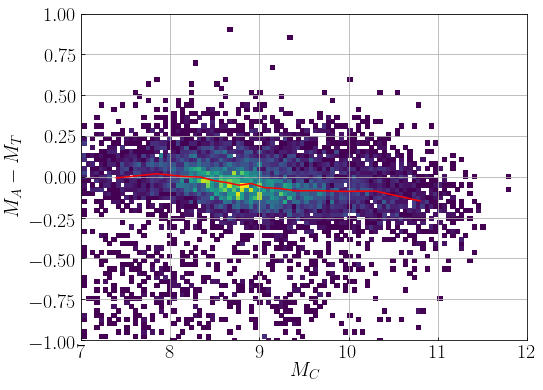

In [5]:
# cat_cut = cat[np.logical_and(cat['CLASS_2']<10,abs(cat['zKDEPeak_1']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 
cat_cut = cat[np.logical_and(cat['CLASS_2']<10,abs(cat['Z_BEST_BC03']-0.8)<0.1)]
# cat_cut = cat[np.logical_and(cat['preds_median_1']<0.89,abs(cat['zKDEPeak_1']-0.4)<0.1)]
# cat_cut = cat_cut[cat_cut['sfProb_1']<0.5]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
x = np.array(cat_cut['MASS_MED'])
y = np.array(cat_cut['MASS_MED_1']-cat_cut['MASS_MED_2'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'r')

plt.xlim([7,12])
plt.ylim([-1,1])
plt.xlabel(r'$M_C$', fontsize=20)
plt.ylabel(r'$M_A-M_T$', fontsize=20)
plt.grid()
# plt.show(); plt.close()
print(y_median)


Text(0, 0.5, '$M_T-M_C$')

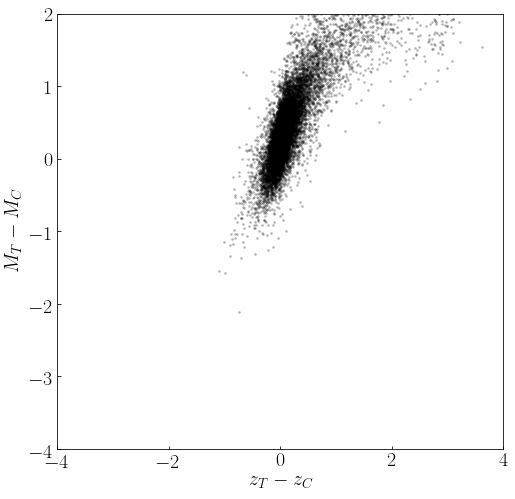

In [312]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))
plt.scatter(cat['Z_BEST_BC03']-cat['ZPDF'], cat['MASS_MED_new']-cat['MASS_MED_C'],color='k',s=3,alpha=0.2)

plt.xlim([-4,4])
plt.ylim([-4,2])
plt.xlabel(r'$z_T-z_C$', fontsize=20)
plt.ylabel(r'$M_T-M_C$', fontsize=20)

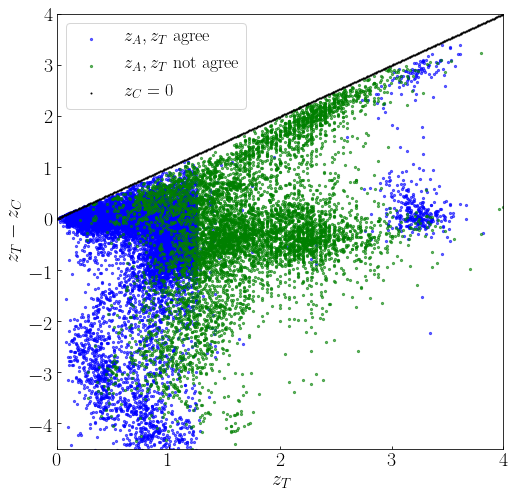

In [352]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

zs = np.linspace(0,4,500)
zss = zs

plt.scatter(cat_agree['Z_BEST_BC03'],cat_agree['Z_BEST_BC03']-cat_agree['ZPDF'],color='b',s=5,alpha=0.6,label='$z_A,z_T$ agree')
plt.scatter(cat_noagree['Z_BEST_BC03'],cat_noagree['Z_BEST_BC03']-cat_noagree['ZPDF'],color='g',s=5,alpha=0.6,label='$z_A,z_T$ not agree')
plt.scatter(zs,zss,s=1,color='k',label='$z_C=0$')

plt.xlim([0,4])
plt.ylim([-4.5,4])
plt.xlabel(r'$z_T$', fontsize=20)
plt.ylabel(r'$z_T-z_C$', fontsize=20)
plt.legend(fontsize=18)

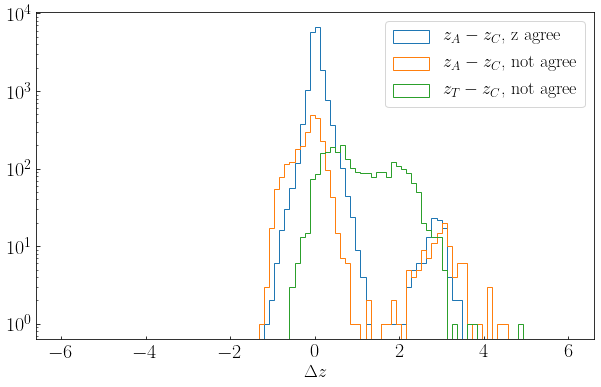

In [295]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(10, 6))

# plt.hist(cat['Z_BEST_BC03']-cat['ZPDF'],bins=100,range=(-6,6),color='k',histtype='step')
plt.hist(cat_agree['zKDEPeak']-cat_agree['ZPDF'],bins=100,range=(-6,6),histtype='step',label='$z_A-z_C$, z agree')
plt.hist(cat_noagree['zKDEPeak']-cat_noagree['ZPDF'],bins=100,range=(-6,6),histtype='step',label='$z_A-z_C$, not agree')
plt.hist(cat_noagree['Z_BEST_BC03']-cat_noagree['ZPDF'],bins=100,range=(-6,6),histtype='step',label='$z_T-z_C$, not agree')

plt.yscale('log')
plt.xlabel(r'$\Delta z$', fontsize=18)
plt.legend(fontsize=18)
plt.show()

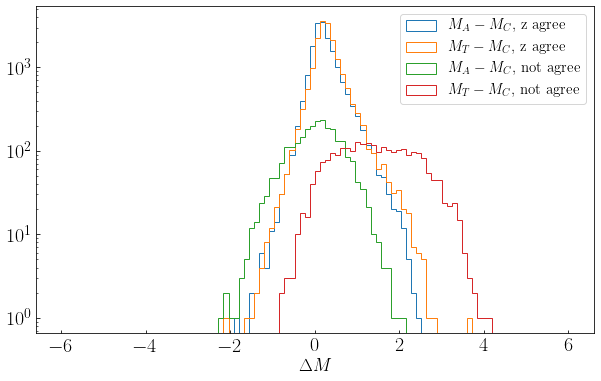

In [296]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(10, 6))

plt.hist(cat_agree['MASS_MED']-cat_agree['MASS_MED_C'],bins=100,range=(-6,6),histtype='step',label='$M_A-M_C$, z agree')
plt.hist(cat_agree['MASS_MED_new']-cat_agree['MASS_MED_C'],bins=100,range=(-6,6),histtype='step',label='$M_T-M_C$, z agree')
plt.hist(cat_noagree['MASS_MED']-cat_noagree['MASS_MED_C'],bins=100,range=(-6,6),histtype='step',label='$M_A-M_C$, not agree')
plt.hist(cat_noagree['MASS_MED_new']-cat_noagree['MASS_MED_C'],bins=100,range=(-6,6),histtype='step',label='$M_T-M_C$, not agree')

plt.yscale('log')
plt.xlabel(r'$\Delta M$', fontsize=18)
plt.legend(fontsize=15)
plt.show()

### matched table in ELAIS

In [206]:
cat = Table.read('CUT_deep_catalogs/s16a_DEEP_deep_masterCat_newz2.fits')

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


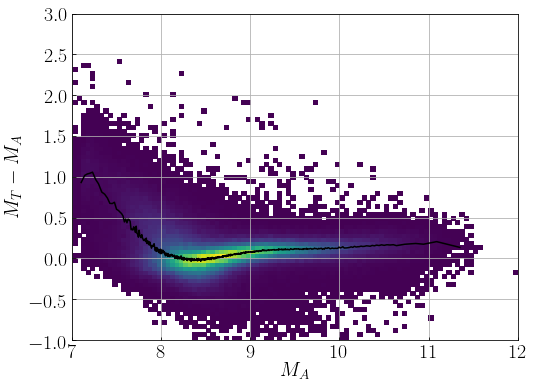

In [208]:
# cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['zKDEPeak_old']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 
cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['Z_BEST_BC03']-0.6)<0.3)] 
cat_cut = cat_cut[cat_cut['sfProb']>0.5]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
x = np.array(cat_cut['MASS_MED_old'])
y = np.array(cat_cut['MASS_MED']-cat_cut['MASS_MED_old'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'k')

plt.xlim([7,12])
plt.ylim([-1,3])
plt.xlabel(r'$M_A$', fontsize=20)
plt.ylabel(r'$M_T-M_A$', fontsize=20)
plt.grid()
# plt.show(); plt.close()

### COSMOS2015 matched catalog (with all of Thibaud's objects)

no parameters from Anneya's catalog are included

In [252]:
cat = Table.read('CUT_deep_catalogs/matched_thibaud_COSMOS.fits')
# '_1' --old parameters
# '_2' --COSMOS parameters

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


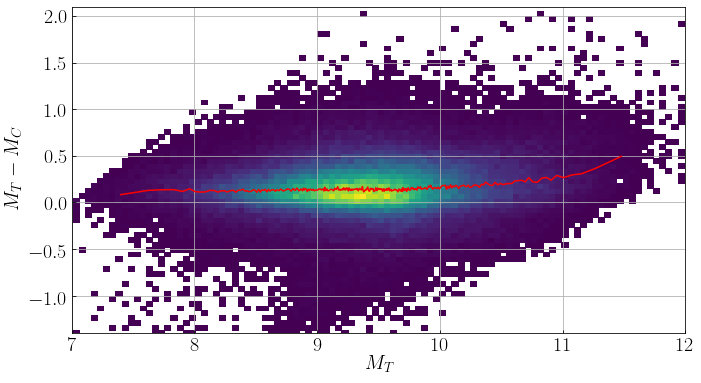

In [262]:
cat_cut = cat[np.logical_and(cat['CLASS_1']<10,abs(cat['ZPDF']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 

# cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['Z_BEST_BC03']-0.6)<0.3)] 
cat_cut = cat_cut[cat_cut['SSFR_BEST_1']>-11]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(11, 6))
x = np.array(cat_cut['MASS_MED_1'])
y = np.array(cat_cut['MASS_MED_1']-cat_cut['MASS_MED_2'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'r')

plt.xlim([7,12])
plt.ylim([-1.4,2.1])
plt.xlabel(r'$M_T$', fontsize=20)
plt.ylabel(r'$M_T-M_C$', fontsize=20)
plt.grid()
# plt.show(); plt.close()

### both-central catalogs (match the central catalogs, using two both-massive cats and isolation criteria)
save catalogs for massive centrals that satisfy both old (M>11.15, zcut) and new (M>11.35,zcut) selection criteria, and also pass the isolation criteria using corresponding selection criteria

In [601]:
cat_names = ['COSMOS_deep','ELAIS_deep', 'DEEP_deep','XMM-LSS_deep','SXDS_uddd']
for cat_name in cat_names:
    for z in [0.4,0.6,0.8]:
        print(cat_name,z)
        cat_old = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.15_'+str(z)+'_params_old.positions.fits')
        cat_new = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.35_'+str(z)+'_params_new.positions.fits')
        cat3 = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
        cat_old_central = setdiff(cat_old,cat_new,keys='NUMBER')
        cat_new_central = setdiff(cat_new,cat_old,keys='NUMBER')

        for gal in cat_old:
            if gal['NUMBER'] in cat_new['NUMBER']:
                cat3.add_row(gal)

        cat3.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_both_central.positions.fits',overwrite=True)
        cat_old_central.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_old_central.positions.fits',overwrite=True)
        cat_new_central.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_new_central.positions.fits',overwrite=True)
        print(len(cat3),len(cat_old_central),len(cat_new_central))
        

COSMOS_deep 0.4
67 8 6
COSMOS_deep 0.6
101 17 16
COSMOS_deep 0.8
121 29 37
ELAIS_deep 0.4
132 29 23
ELAIS_deep 0.6
122 22 29
ELAIS_deep 0.8
97 35 60
DEEP_deep 0.4
141 23 19
DEEP_deep 0.6
162 29 51
DEEP_deep 0.8
129 49 62
XMM-LSS_deep 0.4
99 18 13
XMM-LSS_deep 0.6
106 24 32
XMM-LSS_deep 0.8
115 40 38
SXDS_uddd 0.4
36 10 6
SXDS_uddd 0.6
53 9 7
SXDS_uddd 0.8
38 7 12


check properties of the centrals that satisfy both selection criteria

In [327]:
cat_combined = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
for cat_name in cat_names:
    for z in [0.4,0.6,0.8]:
        cat = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_both_central.positions.fits')
        cat_combined = vstack([cat_combined,cat])
        

Text(0.5, 0, 'MassNew - MassOld  (log)')

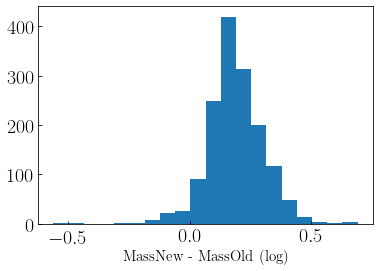

In [336]:
plt.hist(cat_combined['MASS_MED_new']-cat_combined['MASS_MED'],bins=20)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

Text(0.5, 0, 'zNew - zOld  (log)')

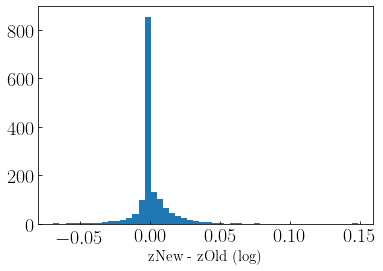

In [437]:
plt.hist(cat_combined['Z_BEST_BC03']-cat_combined['zKDEPeak'],bins=50)
plt.xlabel('zNew - zOld  (log)',fontsize=15)

### new/old-only-central catalogs (match the central catalogs, using two both-massive cats and isolation criteria)
save catalogs for massive centrals that only satisfy old (M>11.15, zcut) or new (M>11.35,zcut) selection criteria, and also pass the isolation criteria using corresponding selection criteria

In [351]:
cat_names = ['COSMOS_deep','ELAIS_deep', 'DEEP_deep','XMM-LSS_deep','SXDS_uddd']
selection = 'old'
cat_only_combined = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
for z in [0.4,0.6,0.8]:
    for cat_name in cat_names:
        print(cat_name,z)
        cat_old_new = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.15_'+str(z)+'_massive_'+selection+'_params_old.positions.fits')
        cat_only_combined = vstack([cat_only_combined,cat_old_new])
    combine_name = 'CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+str(z)+'_massive_'+selection+'_central.positions.fits'
    cat_only_combined.write(combine_name,overwrite=True)
    print(combine_name)
            

COSMOS_deep 0.4
ELAIS_deep 0.4
DEEP_deep 0.4
XMM-LSS_deep 0.4
SXDS_uddd 0.4
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.4_massive_old_central.positions.fits
COSMOS_deep 0.6
ELAIS_deep 0.6
DEEP_deep 0.6
XMM-LSS_deep 0.6
SXDS_uddd 0.6
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.6_massive_old_central.positions.fits
COSMOS_deep 0.8
ELAIS_deep 0.8
DEEP_deep 0.8
XMM-LSS_deep 0.8
SXDS_uddd 0.8
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.8_massive_old_central.positions.fits


Text(0.5, 0, 'MassNew - MassOld  (log)')

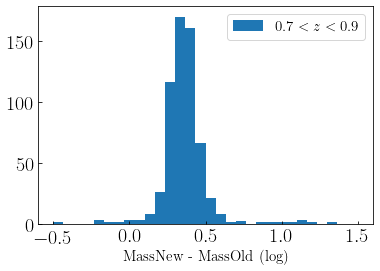

In [435]:
cat_only = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.8_massive_new_central.positions.fits')
plt.hist(cat_only['MASS_MED_new']-cat_only['MASS_MED'],range=(-0.5,1.5),bins=30,label=r'$0.7<z<0.9$')
plt.legend(fontsize=15)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

Text(0.5, 0, 'zNew - zOld  (log)')

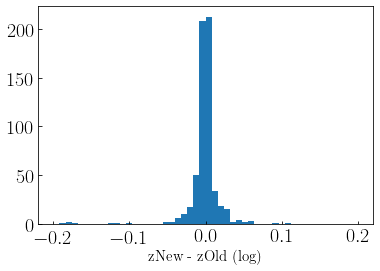

In [436]:
plt.hist(cat_only['Z_BEST_BC03']-cat_only['zKDEPeak'],bins=50,range=(-0.2,0.2))
plt.xlabel('zNew - zOld  (log)',fontsize=15)

### combine the satellite catalogs (old/new catalog directly)
combine satellite catalogs (one for each central) for each field and redshift bin

In [382]:
sat_path = 'CUT_deep_catalogs/total_sample_0321/COSMOS_deep_4.0/'
cat_stack = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])

filelist = glob.glob(sat_path+'/*.fits')

for filename in filelist:
    cat = Table.read(filename)
    cat_stack = vstack([cat_stack,cat])

print(len(cat_stack))

378
14780


Text(0.5, 0, 'zNew - zOld  (log)')

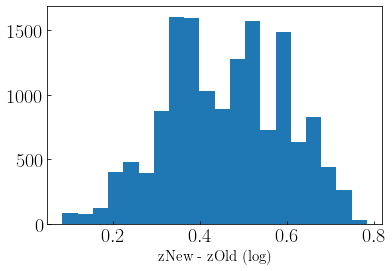

In [389]:
plt.hist(cat_stack['zKDEPeak'],bins=20)
plt.xlabel('zNew - zOld  (log)',fontsize=15)

Text(0.5, 0, 'MassNew - MassOld  (log)')

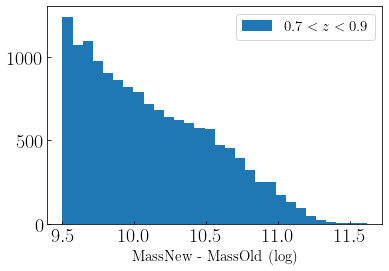

In [390]:
plt.hist(cat_stack['MASS_MED'],bins=30,label=r'$0.7<z<0.9$')
plt.legend(fontsize=15)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

### combine the satellite catalogs (selected from matched cat)
combine satellite catalogs (one for each central) for each field and redshift bin

To compare:
1. overlapping fraction
2. redshift difference
3. mass difference

In [602]:
# stack individual satellite catalogs  ( one per central, selected by old/new params )

params = 'new'
cat_type = 'sat'
path = 'CUT_deep_catalogs/total_sample_matched_cat_'+params+'_params_both-central_0601/'

# stack satellite catalogs by redshift bins (combining from all fields)
for z in [0.4, 0.6, 0.8]:
    # create cat template for stacking (from the same dir)
    filelist = glob.glob(path+'COSMOS_deep_4.0/*_'+cat_type+'.fits')
    cat_sat_temp = Table.read(filelist[0])
    cat_sat_stack =  Table(names=cat_sat_temp.colnames, dtype=[str(y[0]) for x, y in cat_sat_temp.dtype.fields.items()])
    for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
        sat_path = path+cat_name+'_'+str(z*10)+'/'
        filelist = glob.glob(sat_path+'/*_'+cat_type+'.fits')
        
        for filename in filelist:
            cat = Table.read(filename)
            cat_sat_stack = vstack([cat_sat_stack, cat])

    cat_sat_stack = unique(cat_sat_stack,keys='NUMBER')
    cat_sat_stack.write(path+cat_type+'_cat'+str(z*10)+'.fits',overwrite=True)
    
    print('z =',z,len(filelist),len(cat_sat_stack))

z = 0.4 36 20037


z = 0.6 53 26327


z = 0.8 38 25950


In [201]:
# stack individual satellite catalogs  ( one per central, selected by old/new params )
# this time by field 

params = 'old'
cat_type = 'sat'
path = 'CUT_deep_catalogs/total_sample_matched_cat_'+params+'_params_both-central_0601/'

# stack satellite catalogs by redshift bins (combining from all fields)
for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
    
    # create cat template for stacking (from the same dir)
    filelist = glob.glob(path+'COSMOS_deep_4.0/*_'+cat_type+'.fits')
    cat_sat_temp = Table.read(filelist[0])
    cat_sat_stack =  Table(names=cat_sat_temp.colnames, dtype=[str(y[0]) for x, y in cat_sat_temp.dtype.fields.items()])
    
    for z in [0.4, 0.6, 0.8]:
        sat_path = path+cat_name+'_'+str(z*10)+'/'
        filelist = glob.glob(sat_path+'/*_'+cat_type+'.fits')
        
        for filename in filelist:
            cat = Table.read(filename)
            cat_sat_stack = vstack([cat_sat_stack, cat])

    cat_sat_stack = unique(cat_sat_stack,keys='NUMBER')
    cat_sat_stack.write(path+cat_type+'_cat_'+cat_name+'.fits',overwrite=True)
    
    print('field =',cat_name,len(filelist),len(cat_sat_stack))

field = COSMOS_deep 121 14632
field = DEEP_deep 129 21635
field = ELAIS_deep 97 17846
field = XMM-LSS_deep 115 14648
field = SXDS_uddd 38 6144


In [ ]:
# ratio of no. of satellites old/new
z=0.4
path_old = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0601/'
path_new = 'CUT_deep_catalogs/total_sample_matched_cat_new_params_both-central_0601/'

cat_sat_old = Table.read(path_old+'sat_cat'+str(z*10)+'.fits')
cat_sat_new = Table.read(path_new+'sat_cat'+str(z*10)+'.fits')

r_cut = 700 #kpc
cat_sat_old = cat_sat_old[cat_sat_old['radius']<r_cut]
cat_sat_new = cat_sat_new[cat_sat_new['radius']<r_cut]

print(len(cat_sat_old),len(cat_sat_new),len(cat_sat_old)/len(cat_sat_new))

match between the satellite catalogs (stacked for each redshift bin) to find old-only/new-only/both sample, also match with COSMOS2015 catalog (only in COSMOS_deep)

In [158]:
path_old = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0601/'
path_new = 'CUT_deep_catalogs/total_sample_matched_cat_new_params_both-central_0601/'
match_key = 'NUMBER'
cat_type = 'sat'
compare_COSMOS = True
cat_COSMOS_matched = Table.read('CUT_deep_catalogs/COSMOS2015_CLAUDS_matched_0516.fits')

for z in [0.4,0.6,0.8]:
    cat_sat_stack_old_params = Table.read(path_old+cat_type+'_cat'+str(z*10)+'.fits')
    cat_sat_stack_new_params = Table.read(path_new+cat_type+'_cat'+str(z*10)+'.fits')
    
    # match the satellites between catalogs selected using old and new parameters
    cat_sat_stack_both = join(cat_sat_stack_old_params, cat_sat_stack_new_params, keys=match_key,join_type='inner')
    cat_sat_stack_old_only = setdiff(cat_sat_stack_old_params, cat_sat_stack_new_params, keys=match_key)
    cat_sat_stack_new_only = setdiff(cat_sat_stack_new_params, cat_sat_stack_old_params, keys=match_key)
    
    # clean up key names (remove duplicate names)
    unique_keys = [match_key]
    for key in cat_sat_stack_both.keys():
        if '_1' in key:
            unique_keys.append(key[:-2])
            cat_sat_stack_both.rename_column(key, key[:-2])
    cat_sat_stack_both = cat_sat_stack_both[unique_keys]
    
    ### save the catalogs
    # cross-matched
    save_cat_dir = 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/'
    cat_sat_stack_both.write(save_cat_dir+cat_type+'_cat'+str(z*10)+'_both.fits',overwrite=True)
    cat_sat_stack_old_only.write(save_cat_dir+cat_type+'_cat'+str(z*10)+'_old_only.fits',overwrite=True)
    cat_sat_stack_new_only.write(save_cat_dir+cat_type+'_cat'+str(z*10)+'_new_only.fits',overwrite=True)
    
    ### COSMOS2015 comparison
    # matching sat cat with COSMOS2015
    if compare_COSMOS:
        cat_sat_matched_both = join(cat_sat_stack_both, cat_COSMOS_matched, keys=[match_key],join_type='inner')
        cat_sat_matched_old_only = join(cat_sat_stack_old_only, cat_COSMOS_matched, keys=[match_key],join_type='inner')
        cat_sat_matched_new_only = join(cat_sat_stack_new_only, cat_COSMOS_matched, keys=[match_key],join_type='inner')
    
        # matched with COSMOS2015 cat
        cat_sat_matched_both.write(save_cat_dir+cat_type+'_cat'+str(z*10)+'_both_COSMOS2015.fits',overwrite=True)
        cat_sat_matched_old_only.write(save_cat_dir+cat_type+'_cat'+str(z*10)+'_old_only_COSMOS2015.fits',overwrite=True)
        cat_sat_matched_new_only.write(save_cat_dir+cat_type+'_cat'+str(z*10)+'_new_only_COSMOS2015.fits',overwrite=True)

match between the satellite catalogs (stacked for each redshift bin) to find old-only/new-only/both sample, also match with COSMOS2015 catalog (only in COSMOS_deep)\
THIS TIME BY FIELD

In [204]:
path_old = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0601/'
path_new = 'CUT_deep_catalogs/total_sample_matched_cat_new_params_both-central_0601/'
match_key = 'NUMBER'
cat_type = 'sat'
compare_COSMOS = True
cat_COSMOS_matched = Table.read('CUT_deep_catalogs/COSMOS2015_CLAUDS_matched_0516.fits')

for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
    cat_sat_stack_old_params = Table.read(path_old+cat_type+'_cat_'+cat_name+'.fits')
    cat_sat_stack_new_params = Table.read(path_new+cat_type+'_cat_'+cat_name+'.fits')
    
    # match the satellites between catalogs selected using old and new parameters
    cat_sat_stack_both = join(cat_sat_stack_old_params, cat_sat_stack_new_params, keys=match_key,join_type='inner')
    cat_sat_stack_old_only = setdiff(cat_sat_stack_old_params, cat_sat_stack_new_params, keys=match_key)
    cat_sat_stack_new_only = setdiff(cat_sat_stack_new_params, cat_sat_stack_old_params, keys=match_key)
    
    # clean up key names (remove duplicate names)
    unique_keys = [match_key]
    for key in cat_sat_stack_both.keys():
        if '_1' in key:
            unique_keys.append(key[:-2])
            cat_sat_stack_both.rename_column(key, key[:-2])
    cat_sat_stack_both = cat_sat_stack_both[unique_keys]
    
    ### save the catalogs
    # cross-matched
    save_cat_dir = 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/'
    cat_sat_stack_both.write(save_cat_dir+cat_type+'_cat_'+cat_name+'_both.fits',overwrite=True)
    cat_sat_stack_old_only.write(save_cat_dir+cat_type+'_cat_'+cat_name+'_old_only.fits',overwrite=True)
    cat_sat_stack_new_only.write(save_cat_dir+cat_type+'_cat_'+cat_name+'_new_only.fits',overwrite=True)
    
    ### COSMOS2015 comparison
    # matching sat cat with COSMOS2015
    if compare_COSMOS and cat_name == 'COSMOS_deep':
        cat_sat_matched_both = join(cat_sat_stack_both, cat_COSMOS_matched, keys=[match_key],join_type='inner')
        cat_sat_matched_old_only = join(cat_sat_stack_old_only, cat_COSMOS_matched, keys=[match_key],join_type='inner')
        cat_sat_matched_new_only = join(cat_sat_stack_new_only, cat_COSMOS_matched, keys=[match_key],join_type='inner')
    
        # matched with COSMOS2015 cat
        cat_sat_matched_both.write(save_cat_dir+cat_type+'_cat_both_allz_COSMOS2015.fits',overwrite=True)
        cat_sat_matched_old_only.write(save_cat_dir+cat_type+'_cat_old_only_allz_COSMOS2015.fits',overwrite=True)
        cat_sat_matched_new_only.write(save_cat_dir+cat_type+'_cat_new_only_allz_COSMOS2015.fits',overwrite=True)

In [159]:
glob.glob('CUT_deep_catalogs/sat_cat_from_matched_cat_0601/*')

['CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat4.0_old_only.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat4.0_old_only_COSMOS2015.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat8.0_old_only_COSMOS2015.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat4.0_new_only.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat4.0_new_only_COSMOS2015.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat4.0_both.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat8.0_new_only_COSMOS2015.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat8.0_both.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat6.0_both.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat8.0_new_only.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat8.0_both_COSMOS2015.fits',
 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/sat_cat6.0_new_only_COSMOS2015.fits',
 'CUT_deep_catalogs/sat_ca

### satellites: compare with COSMOS2015

In [160]:
# combining matched sat cats from all redshift bins

cat_path = 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/'
match_type = '_COSMOS2015' # ''-- between old and new selected cat // '_COSMOS2015'-- also matched with COSMOS2015

for selection_type in ['both', 'old_only', 'new_only']:
    
    cat_sat_temp = Table.read(cat_path + 'sat_cat4.0_'+selection_type+match_type+'.fits')
    cat_sat_stack_temp =  Table(names=cat_sat_temp.colnames, dtype=[str(y[0]) for x, y in cat_sat_temp.dtype.fields.items()])
    
    for z in [0.4, 0.6, 0.8]:
        cat_sat_zbin = Table.read(cat_path + 'sat_cat'+str(z*10)+'_'+selection_type+match_type+'.fits')
        cat_sat_stack_temp = vstack([cat_sat_stack_temp, cat_sat_zbin])
    
    cat_sat_stack_temp = unique(cat_sat_stack_temp,keys='NUMBER')
    cat_sat_stack_temp.write(cat_path+'sat_cat_'+selection_type+match_type+'.fits',overwrite=True)

In [161]:
read_path = 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/'
z='' # ''--allz '0.4'--0.4 z_bin

cat_sat_COSMOS_matched_both = Table.read(read_path+'sat_cat'+str(z*10)+'_both_COSMOS2015.fits')
cat_sat_COSMOS_matched_old_only = Table.read(read_path+'sat_cat'+str(z*10)+'_old_only_COSMOS2015.fits')
cat_sat_COSMOS_matched_new_only = Table.read(read_path+'sat_cat'+str(z*10)+'_new_only_COSMOS2015.fits')
print(len(cat_sat_COSMOS_matched_both),len(cat_sat_COSMOS_matched_old_only),len(cat_sat_COSMOS_matched_new_only))

687 83 28


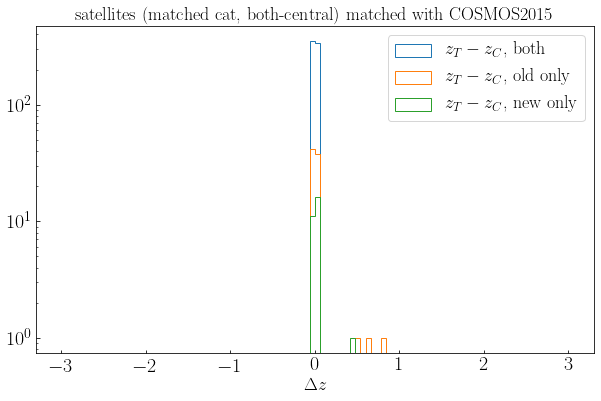

In [181]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(10, 6))
hist_range = (-3,3)
zkeyname_1 = 'Z_BEST_BC03_1'
zkeyname_2 = 'zKDEPeak_1'

plt.hist(cat_sat_COSMOS_matched_both[zkeyname_1]-cat_sat_COSMOS_matched_both[zkeyname_2],bins=100,range=hist_range,histtype='step',label='$z_T-z_C$, both')
plt.hist(cat_sat_COSMOS_matched_old_only[zkeyname_1]-cat_sat_COSMOS_matched_old_only[zkeyname_2],bins=100,range=hist_range,histtype='step',label='$z_T-z_C$, old only')
plt.hist(cat_sat_COSMOS_matched_new_only[zkeyname_1]-cat_sat_COSMOS_matched_new_only[zkeyname_2],bins=100,range=hist_range,histtype='step',label='$z_T-z_C$, new only')

plt.yscale('log')
plt.xlabel(r'$\Delta z$', fontsize=18)
plt.legend(fontsize=18)
plt.title('satellites (matched cat, both-central) matched with COSMOS2015',fontsize=18)
plt.show()

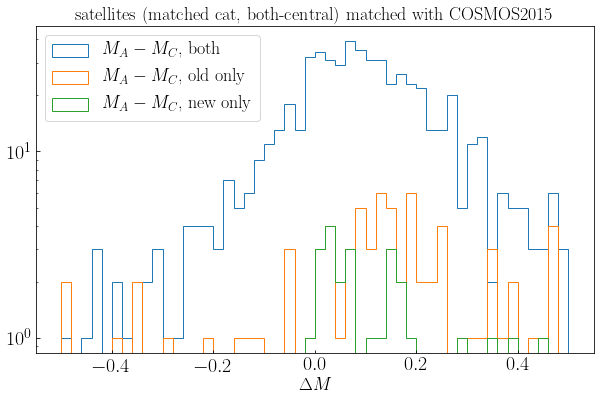

In [163]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(10, 6))
read_path = 'CUT_deep_catalogs/sat_cat_from_matched_cat_0506/'
mkeyname_1 = 'MASS_MED_1'
mkeyname_2 = 'MASS_MED_C'

hist_range = (-0.5,0.5)
plt.hist(cat_sat_COSMOS_matched_both[mkeyname_1]-cat_sat_COSMOS_matched_both[mkeyname_2],bins=50,range=hist_range,histtype='step',label='$M_A-M_C$, both')
plt.hist(cat_sat_COSMOS_matched_old_only[mkeyname_1]-cat_sat_COSMOS_matched_old_only[mkeyname_2],bins=50,range=hist_range,histtype='step',label='$M_A-M_C$, old only')
plt.hist(cat_sat_COSMOS_matched_new_only[mkeyname_1]-cat_sat_COSMOS_matched_new_only[mkeyname_2],bins=50,range=hist_range,histtype='step',label='$M_A-M_C$, new only')

plt.yscale('log')
plt.xlabel(r'$\Delta M$', fontsize=18)
plt.legend(fontsize=18, loc='upper left')
plt.title('satellites (matched cat, both-central) matched with COSMOS2015',fontsize=18)
plt.show()

0.4350236207542024


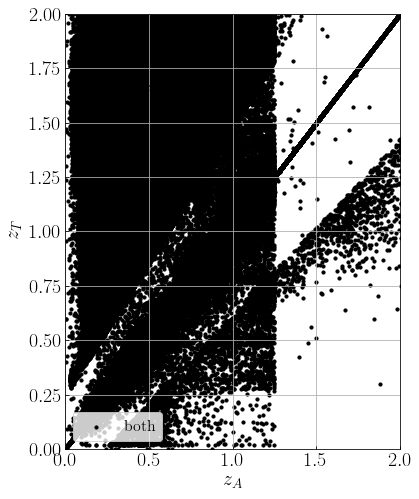

In [265]:
# cat_matched: matched between old and new CLAUDS cat

cat_matched = Table.read('CUT_deep_catalogs/s16a_COSMOS_deep_masterCat_newz4.fits')
cat_matched = cat_matched[cat_matched['matched']==True]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(6, 8))

plt.scatter(cat_matched['zKDEPeak'],
            cat_matched['Z_BEST_BC03'],label='both',color='k',s=10)

cat_cut = cat_matched[abs(cat_matched['zKDEPeak'] - cat_matched['Z_BEST_BC03'])>0.05*cat_matched['Z_BEST_BC03']]
print(len(cat_cut)/len(cat_matched))
    
    
plt.xlim([0,2])
plt.ylim([0,2])
# plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$z_A$', fontsize=20)
plt.ylabel(r'$z_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

0.2367777337035568


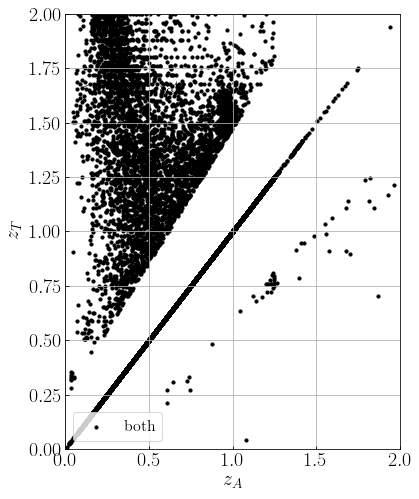

In [250]:
# cat_COSMOS_matched: matched between old and new CLAUDS cat and then matched with COSMOS2015 (Laigle+2016)

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(6, 8))
cat_COSMOS_matched = cat_COSMOS_matched[cat_COSMOS_matched['matched']==True]

plt.scatter(cat_COSMOS_matched['zKDEPeak'],
            cat_COSMOS_matched['Z_BEST_BC03'],label='both',color='k',s=10)

cat_cut = cat_COSMOS_matched[abs(cat_COSMOS_matched['zKDEPeak'] - cat_COSMOS_matched['Z_BEST_BC03'])>0.05*cat_COSMOS_matched['Z_BEST_BC03']]
print(len(cat_cut)/len(cat_COSMOS_matched))
    
    
plt.xlim([0,2])
plt.ylim([0,2])
# plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$z_A$', fontsize=20)
plt.ylabel(r'$z_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

### COSMOS: z_difff as a function of magnitude?

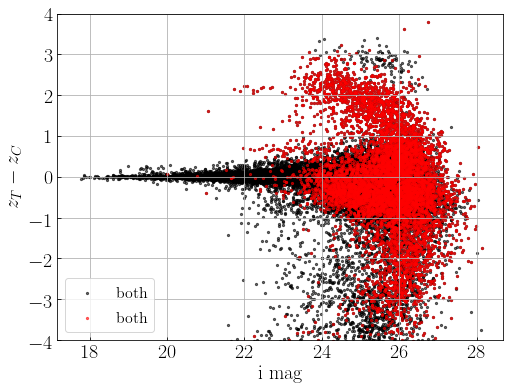

In [274]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
cat_COSMOS_matched = cat_COSMOS_matched[cat_COSMOS_matched['matched']==True]

plt.scatter(cat_COSMOS_matched['i'],cat_COSMOS_matched['Z_BEST_BC03']-cat_COSMOS_matched['ZPDF'],label='both',color='k',s=5,alpha=0.6)
cat_cut = cat_COSMOS_matched[abs(cat_COSMOS_matched['zKDEPeak'] - cat_COSMOS_matched['Z_BEST_BC03'])>0.05*cat_COSMOS_matched['Z_BEST_BC03']]
plt.scatter(cat_cut['i'],cat_cut['Z_BEST_BC03']-cat_cut['ZPDF'],label='both',color='r',s=5,alpha=0.6)
    
# plt.xlim([-2,25])
plt.ylim([-4,4])
plt.xlabel('i mag', fontsize=20)
plt.ylabel(r'$z_T - z_C$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

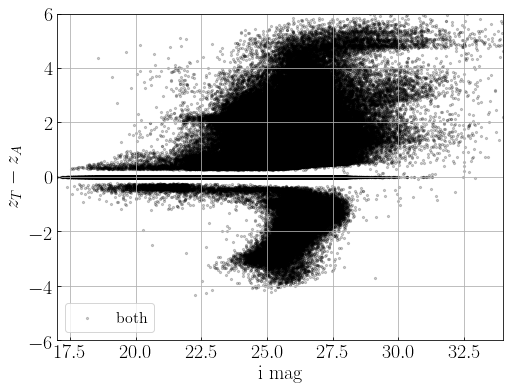

In [278]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
plt.scatter(cat_matched['i'],cat_matched['Z_BEST_BC03']-cat_matched['zKDEPeak'],label='both',color='k',s=5,alpha=0.2)

plt.xlim([17,34])
plt.ylim([-6,6])
plt.xlabel('i mag', fontsize=20)
plt.ylabel(r'$z_T - z_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


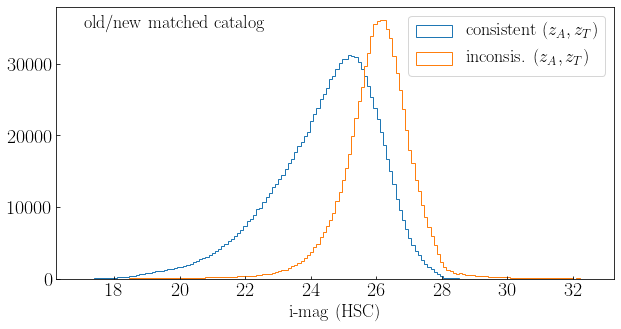

In [292]:
# cat_incon_z: inconssitent-z objects from cat_matched
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(10, 5))
cat_matched_incon_z = cat_matched[abs(cat_matched['zKDEPeak'] - cat_matched['Z_BEST_BC03'])>0.05*cat_matched['Z_BEST_BC03']]
cat_matched_con_z = cat_matched[abs(cat_matched['zKDEPeak'] - cat_matched['Z_BEST_BC03'])<0.05*cat_matched['Z_BEST_BC03']]

plt.hist(cat_matched_con_z['i'],histtype='step',range=(17,32.5),bins=160,label='consistent $(z_A,z_T)$')
plt.hist(cat_matched_incon_z['i'],histtype='step',range=(17,32.5),bins=160,label='inconsis. $(z_A,z_T)$')
plt.annotate('old/new matched catalog',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.xlabel('i-mag (HSC)',fontsize=18)
plt.legend(fontsize=18)
plt.show()
plt.close()

0.0
0.03614457831325301
0.03571428571428571


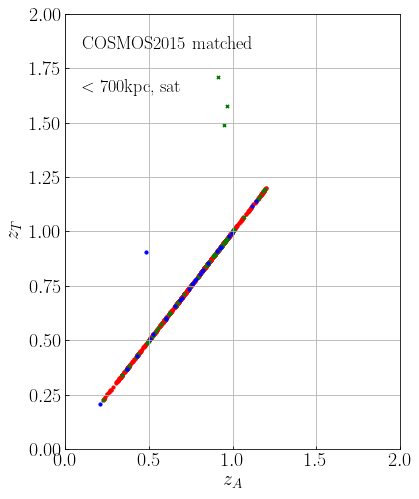

In [231]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(6, 8))
for cat in [cat_sat_COSMOS_matched_both, cat_sat_COSMOS_matched_old_only, cat_sat_COSMOS_matched_new_only]:
    cat_cut = cat[abs(cat['zKDEPeak_1'] - cat['Z_BEST_BC03_1'])>0.05*cat['Z_BEST_BC03_1']]
    print(len(cat_cut)/len(cat))
#     -cat_sat_COSMOS_matched_both['ZPDF']
plt.scatter(cat_sat_COSMOS_matched_both['zKDEPeak_1'], 
            cat_sat_COSMOS_matched_both['Z_BEST_BC03_1'],label='both',color='r',s=10)
plt.scatter(cat_sat_COSMOS_matched_old_only['zKDEPeak_1'],
            cat_sat_COSMOS_matched_old_only['Z_BEST_BC03_1'],label='old only',color='g',s=10,marker='x')
plt.scatter(cat_sat_COSMOS_matched_new_only['zKDEPeak_1'],
            cat_sat_COSMOS_matched_new_only['Z_BEST_BC03_1'],label='new only',color='b',s=10)

plt.xlim([0,2])
plt.ylim([0,2])
plt.annotate('COSMOS2015 matched',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$z_A$', fontsize=20)
plt.ylabel(r'$z_T$', fontsize=20)
plt.grid()
# plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

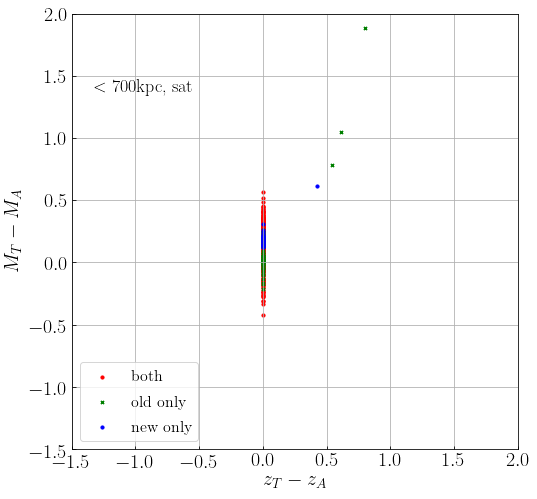

In [62]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

plt.scatter(cat_sat_COSMOS_matched_both['Z_BEST_BC03_1']-cat_sat_COSMOS_matched_both['zKDEPeak_1'], cat_sat_COSMOS_matched_both['MASS_MED_new_1']-cat_sat_COSMOS_matched_both['MASS_MED_1'],label='both',color='r',s=10)
plt.scatter(cat_sat_COSMOS_matched_old_only['Z_BEST_BC03_1']-cat_sat_COSMOS_matched_old_only['zKDEPeak_1'],cat_sat_COSMOS_matched_old_only['MASS_MED_new_1']-cat_sat_COSMOS_matched_old_only['MASS_MED_1'],label='old only',color='g',s=10,marker='x')
plt.scatter(cat_sat_COSMOS_matched_new_only['Z_BEST_BC03_1']-cat_sat_COSMOS_matched_new_only['zKDEPeak_1'],cat_sat_COSMOS_matched_new_only['MASS_MED_new_1']-cat_sat_COSMOS_matched_new_only['MASS_MED_1'],label='new only',color='b',s=10)

plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
# plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$z_T-z_A$', fontsize=20)
plt.ylabel(r'$M_T - M_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

### satellite: compare old and new selected sample

In [293]:
path = 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/'
z=0.4
cat_type = 'sat'

cat_sat_stack_both = Table.read(path+cat_type+'_cat'+str(z*10)+'_both.fits')
cat_sat_stack_old_only = Table.read(path+cat_type+'_cat'+str(z*10)+'_old_only.fits') 
cat_sat_stack_new_only = Table.read(path+cat_type+'_cat'+str(z*10)+'_new_only.fits') 


# radius cut
r_cut = 700 #kpc
cat_sat_both_cut = cat_sat_stack_both[cat_sat_stack_both['radius']<r_cut]
cat_sat_old_only_cut = cat_sat_stack_old_only[cat_sat_stack_old_only['radius']<r_cut]
cat_sat_new_only_cut = cat_sat_stack_new_only[cat_sat_stack_new_only['radius']<r_cut]

# fractions
len_combined = len(cat_sat_both_cut)+len(cat_sat_old_only_cut)+len(cat_sat_new_only_cut)
print(len_combined)
print(round(len(cat_sat_both_cut)/len_combined,3), 
            round(len(cat_sat_old_only_cut)/len_combined,3), 
            round(len(cat_sat_new_only_cut)/len_combined,3))

22548
0.836 0.111 0.053


2511


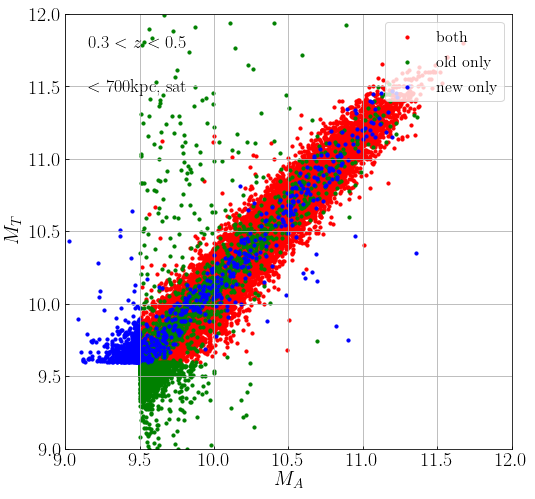

In [196]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

# plot
plt.scatter(cat_sat_both_cut['MASS_MED'],cat_sat_both_cut['MASS_MED_new'],label='both',color='r',s=10)
plt.scatter(cat_sat_old_only_cut['MASS_MED'],cat_sat_old_only_cut['MASS_MED_new'],label='old only',color='g',s=10)
plt.scatter(cat_sat_new_only_cut['MASS_MED'],cat_sat_new_only_cut['MASS_MED_new'],label='new only',color='b',s=10)

print(len(cat_sat_stack_old_only))

plt.xlim([9.0,12])
plt.ylim([9.0,12])
plt.annotate('$'+str(round(z-0.1,1))+'<z<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$M_A$', fontsize=20)
plt.ylabel(r'$M_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='upper right')
# plt.show(); plt.close()

In [222]:
cat_name = 'COSMOS_deep'
path = 'CUT_deep_catalogs/sat_cat_from_matched_cat_0601/'

cat_sat_both_field = Table.read(path+cat_type+'_cat_'+cat_name+'_both.fits')
cat_sat_old_only_field = Table.read(path+cat_type+'_cat_'+cat_name+'_old_only.fits') 
cat_sat_new_only_field = Table.read(path+cat_type+'_cat_'+cat_name+'_new_only.fits') 

for cat in [cat_sat_both_field, cat_sat_old_only_field, cat_sat_new_only_field]:
    cat_cut = cat[abs(cat['zKDEPeak'] - cat['Z_BEST_BC03'])>0.05*cat['Z_BEST_BC03']]
    print(len(cat_cut)/len(cat))



0.003186445946996192
0.10594900849858357
0.09666080843585237


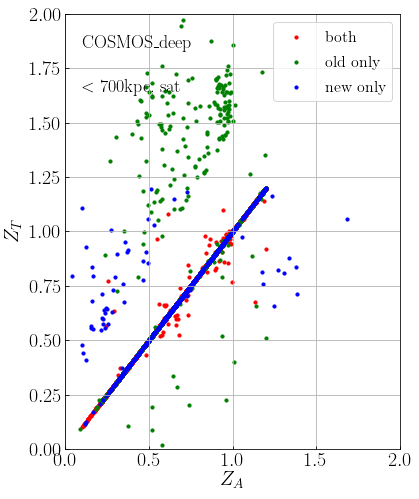

In [232]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(6,8))

# plot
plt.scatter(cat_sat_both_field['zKDEPeak'],cat_sat_both_field['Z_BEST_BC03'],label='both',color='r',s=10)
plt.scatter(cat_sat_old_only_field['zKDEPeak'],cat_sat_old_only_field['Z_BEST_BC03'],label='old only',color='g',s=10)
plt.scatter(cat_sat_new_only_field['zKDEPeak'],cat_sat_new_only_field['Z_BEST_BC03'],label='new only',color='b',s=10)

plt.xlim([0,2])
plt.ylim([0,2])
plt.annotate(cat_name.replace('_','\_'),xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$Z_A$', fontsize=20)
plt.ylabel(r'$Z_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='upper right')

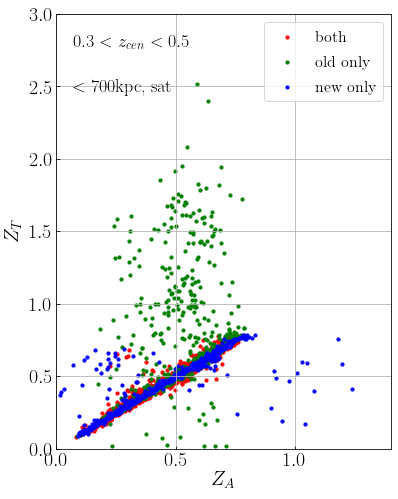

In [195]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(6,8))

# plot
plt.scatter(cat_sat_both_cut['zKDEPeak'],cat_sat_both_cut['Z_BEST_BC03'],label='both',color='r',s=10)
plt.scatter(cat_sat_old_only_cut['zKDEPeak'],cat_sat_old_only_cut['Z_BEST_BC03'],label='old only',color='g',s=10)
plt.scatter(cat_sat_new_only_cut['zKDEPeak'],cat_sat_new_only_cut['Z_BEST_BC03'],label='new only',color='b',s=10)

plt.xlim([0,1.4])
plt.ylim([0,3])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$Z_A$', fontsize=20)
plt.ylabel(r'$Z_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='upper right')

In [ ]:
# magnitude distribution of satellites



2511


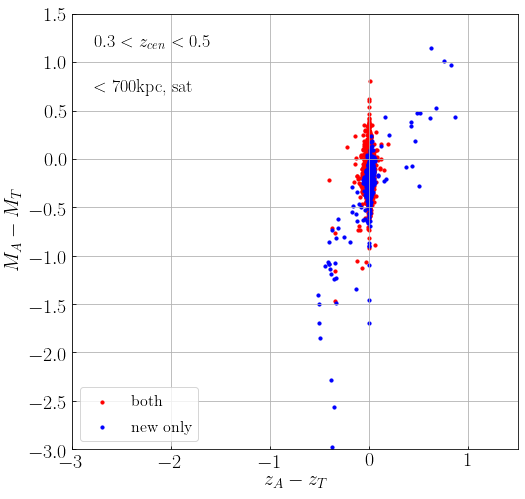

In [120]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

# plot
plt.scatter(cat_sat_both_cut['zKDEPeak']-cat_sat_both_cut['Z_BEST_BC03'], cat_sat_both_cut['MASS_MED']-cat_sat_both_cut['MASS_MED_new'],label='both',color='r',s=10)
# plt.scatter(cat_sat_old_only_cut['zKDEPeak']-cat_sat_old_only_cut['Z_BEST_BC03'], cat_sat_old_only_cut['MASS_MED']-cat_sat_old_only_cut['MASS_MED_new'],label='old only',color='g',s=10)
plt.scatter(cat_sat_new_only_cut['zKDEPeak']-cat_sat_new_only_cut['Z_BEST_BC03'],cat_sat_new_only_cut['MASS_MED']-cat_sat_new_only_cut['MASS_MED_new'],label='new only',color='b',s=10)
print(len(cat_sat_stack_old_only))

plt.xlim([-3,1.5])
plt.ylim([-3,1.5])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$z_A - z_T$', fontsize=20)
plt.ylabel(r'$M_A - M_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

### fraction of contributions for old-only/new-only sat cat

In [167]:
#old-only
print('in old-only sat cat','z =',z,'r_cut:',r_cut,'total:',len(cat_sat_old_only_cut))

# cut out z-non-onsistent sats
cat_sat_old_only_cut_badz = cat_sat_old_only_cut[abs(cat_sat_old_only_cut['zKDEPeak']-cat_sat_old_only_cut['Z_BEST_BC03'])>0.05*cat_sat_old_only_cut['Z_BEST_BC03']]
print(round(len(cat_sat_old_only_cut_badz)/len(cat_sat_old_only_cut)*100,1))

# M_T<9.6 sats
cat_sat_old_only_cut_lowmt = cat_sat_old_only_cut[cat_sat_old_only_cut['MASS_MED_new']<9.6]
print(round(len(cat_sat_old_only_cut_lowmt)/len(cat_sat_old_only_cut)*100,1))

# CLASS>0
cat_sat_old_only_cut_nongal = cat_sat_old_only_cut[cat_sat_old_only_cut['CLASS']>0]
print(round(len(cat_sat_old_only_cut_nongal)/len(cat_sat_old_only_cut)*100,1))

# CLASS=10
cat_sat_old_only_cut_nongal1 = cat_sat_old_only_cut[cat_sat_old_only_cut['CLASS']==10]
print(round(len(cat_sat_old_only_cut_nongal1)/len(cat_sat_old_only_cut)*100,1))

# CLASS=20
cat_sat_old_only_cut_nongal2 = cat_sat_old_only_cut[cat_sat_old_only_cut['CLASS']==20]
print(round(len(cat_sat_old_only_cut_nongal2)/len(cat_sat_old_only_cut)*100,1))

# CLASS=40
cat_sat_old_only_cut_nongal3 = cat_sat_old_only_cut[cat_sat_old_only_cut['CLASS']==40]
print(round(len(cat_sat_old_only_cut_nongal3)/len(cat_sat_old_only_cut)*100,1))

# CLASS>40
cat_sat_old_only_cut_nongal4 = cat_sat_old_only_cut[cat_sat_old_only_cut['CLASS']>40]
print(round(len(cat_sat_old_only_cut_nongal4)/len(cat_sat_old_only_cut)*100,3))

in old-only sat cat z = 0.4 r_cut: 700 total: 2511
15.3
55.2
25.1
8.7
14.7
1.6
0.04


In [307]:
# "other" sample
cat_other = cat_sat_old_only_cut[abs(cat_sat_old_only_cut['zKDEPeak']-cat_sat_old_only_cut['Z_BEST_BC03'])<0.05*cat_sat_old_only_cut['Z_BEST_BC03']]

# M_T<9.6 sats
cat_other = cat_other[cat_other['MASS_MED_new']>9.6]

# CLASS>0
cat_other = cat_other[cat_other['CLASS']==0]
print(len(cat_other))

317


In [130]:
#new_only
print('in old-only sat cat','z =',z,'r_cut:',r_cut,'total:',len(cat_sat_new_only_cut))

# cut out z-non-onsistent sats
cat_sat_new_only_cut_badz = cat_sat_new_only_cut[abs(cat_sat_new_only_cut['zKDEPeak']-cat_sat_new_only_cut['Z_BEST_BC03'])>0.05*cat_sat_new_only_cut['Z_BEST_BC03']]
print(round(len(cat_sat_new_only_cut_badz)/len(cat_sat_new_only_cut)*100,1))

# M_A<9.5 sats
cat_sat_new_only_cut_lowma = cat_sat_new_only_cut[cat_sat_new_only_cut['MASS_MED']<9.5]
print(round(len(cat_sat_new_only_cut_lowma)/len(cat_sat_new_only_cut)*100,1))

# preds_median>0.89
cat_sat_new_only_cut_nongal = cat_sat_new_only_cut[cat_sat_new_only_cut['preds_median']>0.89]
print(round(len(cat_sat_new_only_cut_nongal)/len(cat_sat_new_only_cut)*100,1))

# inside == False
cat_sat_new_only_cut_nogeo = cat_sat_new_only_cut[cat_sat_new_only_cut['inside']==False]
print(round(len(cat_sat_new_only_cut_nogeo)/len(cat_sat_new_only_cut)*100,1))

# large-r
cat_sat_new_only_cut_larger = cat_sat_new_only_cut[cat_sat_new_only_cut['radius']>697]
print(round(len(cat_sat_new_only_cut_larger)/len(cat_sat_new_only_cut)*100,1))

in old-only sat cat z = 0.4 r_cut: 700 total: 1187
11.3
66.0
0.0
1.1
1.5


Text(0, 0.5, 'CLASS')

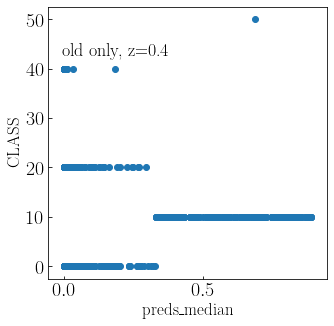

In [741]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(5, 5))

plt.annotate('old only, z='+str(z),xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.scatter(cat_sat_old_only_cut['preds_median'],cat_sat_old_only_cut['CLASS'])
plt.xlabel('preds\_median', fontsize=17)
plt.ylabel('CLASS', fontsize=17)

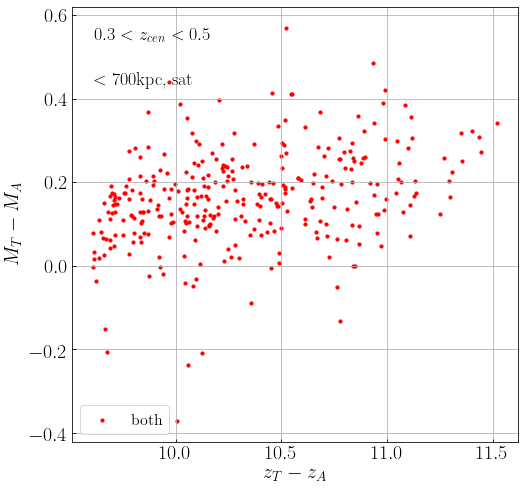

In [312]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

plt.scatter(cat_other['MASS_MED_new'], cat_other['MASS_MED_new']-cat_other['MASS_MED'],label='both',color='r',s=10)

# plt.xlim([-1.5,2])
# plt.ylim([-1.5,2])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$z_T-z_A$', fontsize=20)
plt.ylabel(r'$M_T - M_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

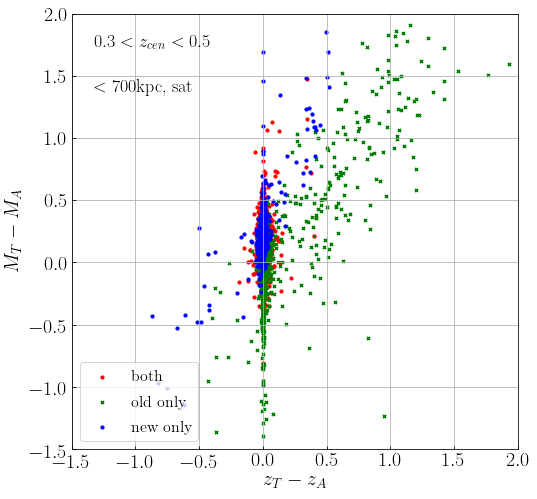

In [20]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

plt.scatter(cat_sat_both_cut['Z_BEST_BC03']-cat_sat_both_cut['zKDEPeak'], cat_sat_both_cut['MASS_MED_new']-cat_sat_both_cut['MASS_MED'],label='both',color='r',s=10)
plt.scatter(cat_sat_old_only_cut['Z_BEST_BC03']-cat_sat_old_only_cut['zKDEPeak'],cat_sat_old_only_cut['MASS_MED_new']-cat_sat_old_only_cut['MASS_MED'],label='old only',color='g',s=10,marker='x')
plt.scatter(cat_sat_new_only_cut['Z_BEST_BC03']-cat_sat_new_only_cut['zKDEPeak'],cat_sat_new_only_cut['MASS_MED_new']-cat_sat_new_only_cut['MASS_MED'],label='new only',color='b',s=10)

plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$z_T-z_A$', fontsize=20)
plt.ylabel(r'$M_T - M_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

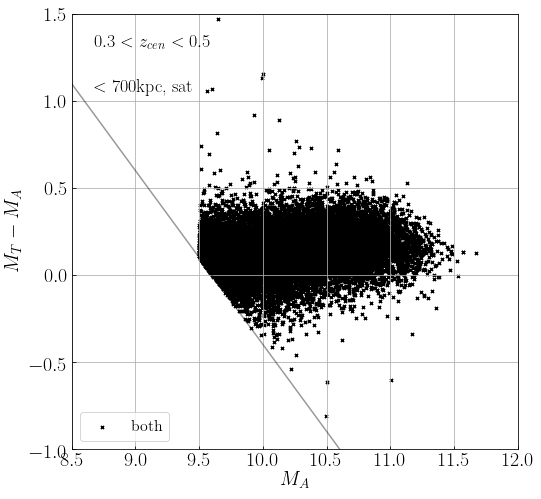

In [146]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

# M_T = 9.6 line
x = np.linspace(8.5,11.5,200)
y = 9.6-x
plt.plot(x,y,'k',alpha=0.4)

plt.scatter(cat_sat_both_cut['MASS_MED'],cat_sat_both_cut['MASS_MED_new']-cat_sat_both_cut['MASS_MED'],label='both',color='k',s=10,marker='x')

plt.xlim([8.5,12])
plt.ylim([-1,1.5])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$M_A$', fontsize=20)
plt.ylabel(r'$M_T - M_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

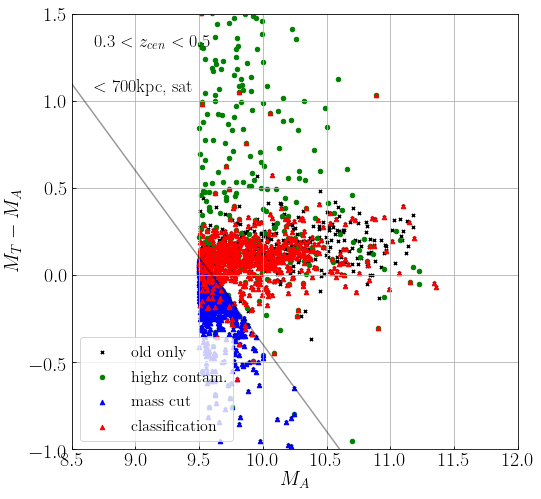

In [168]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

# M_T = 9.6 line
x = np.linspace(8.5,11.5,200)
y = 9.6-x
plt.plot(x,y,'k',alpha=0.4)

plt.scatter(cat_sat_old_only_cut['MASS_MED'],cat_sat_old_only_cut['MASS_MED_new']-cat_sat_old_only_cut['MASS_MED'],label='old only',color='k',s=10,marker='x')

###
plt.scatter(cat_sat_old_only_cut_badz['MASS_MED'],cat_sat_old_only_cut_badz['MASS_MED_new']-cat_sat_old_only_cut_badz['MASS_MED'],label='highz contam.',c='g',s=20,marker='o')
plt.scatter(cat_sat_old_only_cut_lowmt['MASS_MED'],cat_sat_old_only_cut_lowmt['MASS_MED_new']-cat_sat_old_only_cut_lowmt['MASS_MED'],label='mass cut',c='b',s=20,marker='^')
plt.scatter(cat_sat_old_only_cut_nongal['MASS_MED'],cat_sat_old_only_cut_nongal['MASS_MED_new']-cat_sat_old_only_cut_nongal['MASS_MED'],label='classification',c='r',s=20,marker='^')

plt.xlim([8.5,12])
plt.ylim([-1,1.5])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$M_A$', fontsize=20)
plt.ylabel(r'$M_T - M_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

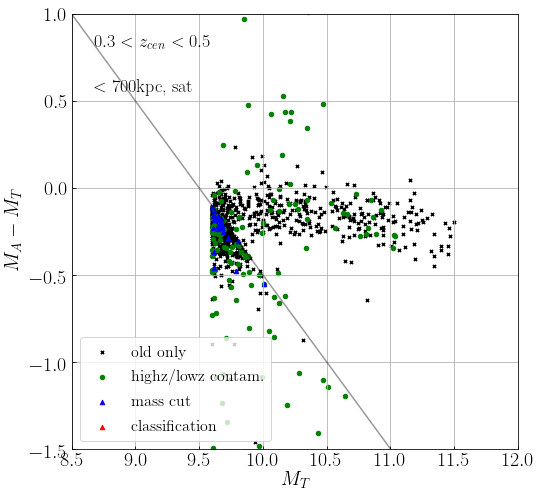

In [169]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

# M_A = 9.5 line
x = np.linspace(8.5,11.5,200)
y = 9.5-x
plt.plot(x,y,'k',alpha=0.4)

plt.scatter(cat_sat_new_only_cut['MASS_MED_new'],cat_sat_new_only_cut['MASS_MED']-cat_sat_new_only_cut['MASS_MED_new'],label='old only',color='k',s=10,marker='x')

###
plt.scatter(cat_sat_new_only_cut_badz['MASS_MED_new'],cat_sat_new_only_cut_badz['MASS_MED']-cat_sat_new_only_cut_badz['MASS_MED_new'],label='highz/lowz contam.',c='g',s=20,marker='o')
plt.scatter(cat_sat_new_only_cut_lowmt['MASS_MED_new'],cat_sat_new_only_cut_lowmt['MASS_MED']-cat_sat_new_only_cut_lowmt['MASS_MED_new'],label='mass cut',c='b',s=20,marker='^')
plt.scatter(cat_sat_new_only_cut_nongal['MASS_MED_new'],cat_sat_new_only_cut_nongal['MASS_MED']-cat_sat_new_only_cut_nongal['MASS_MED_new'],label='classification',c='r',s=20,marker='^')
# plt.scatter(cat_sat_new_only_cut_larger['MASS_MED_new'],cat_sat_new_only_cut_larger['MASS_MED']-cat_sat_new_only_cut_larger['MASS_MED_new'],label='classification',c='y',s=20,marker='^')

plt.xlim([8.5,12])
plt.ylim([-1.5,1])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$M_T$', fontsize=20)
plt.ylabel(r'$M_A - M_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

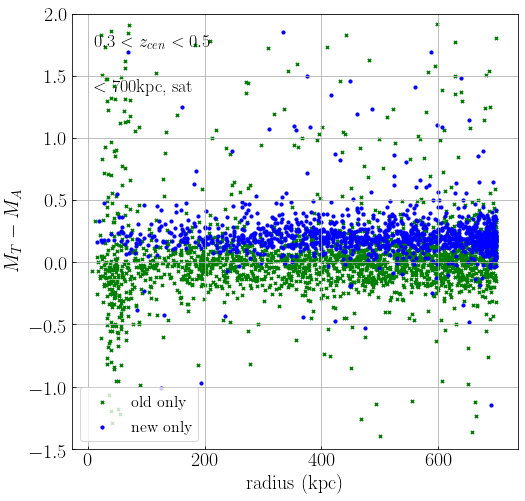

In [38]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

# plt.scatter(cat_sat_both_cut['radius'], cat_sat_both_cut['MASS_MED_new']-cat_sat_both_cut['MASS_MED'],label='both',color='r',s=10)
plt.scatter(cat_sat_old_only_cut['radius'],cat_sat_old_only_cut['MASS_MED_new']-cat_sat_old_only_cut['MASS_MED'],label='old only',color='g',s=10,marker='x')
plt.scatter(cat_sat_new_only_cut['radius'],cat_sat_new_only_cut['MASS_MED_new']-cat_sat_new_only_cut['MASS_MED'],label='new only',color='b',s=10)

# plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel('radius (kpc)', fontsize=20)
plt.ylabel(r'$M_T - M_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

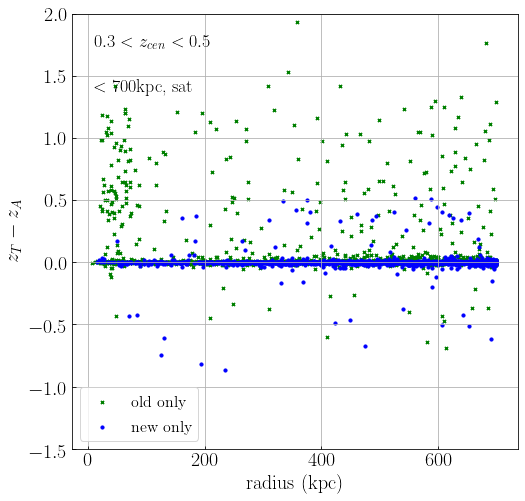

In [39]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

# plt.scatter(cat_sat_both_cut['radius'], cat_sat_both_cut['Z_BEST_BC03']-cat_sat_both_cut['zKDEPeak'],label='both',color='r',s=10)
plt.scatter(cat_sat_old_only_cut['radius'],cat_sat_old_only_cut['Z_BEST_BC03']-cat_sat_old_only_cut['zKDEPeak'],label='old only',color='g',s=10,marker='x')
plt.scatter(cat_sat_new_only_cut['radius'],cat_sat_new_only_cut['Z_BEST_BC03']-cat_sat_new_only_cut['zKDEPeak'],label='new only',color='b',s=10)

# plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc, '+cat_type,xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel('radius (kpc)', fontsize=20)
plt.ylabel(r'$z_T - z_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

old_only 0.703
new_only 0.884
both 0.605


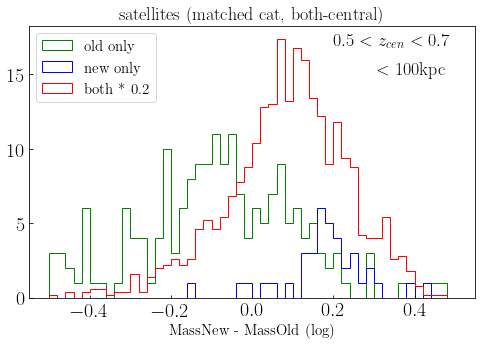

In [582]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))

m_diff_old_only = cat_sat_old_only_cut['MASS_MED_new']-cat_sat_old_only_cut['MASS_MED']
m_diff_new_only = cat_sat_new_only_cut['MASS_MED_new']-cat_sat_new_only_cut['MASS_MED']
m_diff_both = cat_sat_both_cut['MASS_MED_new']-cat_sat_both_cut['MASS_MED']

mdiff_range = (-0.5,0.5)
plt.hist(m_diff_old_only,bins=50,range=mdiff_range,color='g',histtype='step',label='old only')
plt.hist(m_diff_new_only,bins=50,range=mdiff_range,color='b',histtype='step',label='new only')
plt.hist(m_diff_both,bins=50,range=mdiff_range,color='r',histtype='step',weights=np.ones(len(cat_sat_both_cut))*0.2,
        label='both * 0.2')

plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.68,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc',xy=([0.78,0.82]),xycoords='axes fraction',fontsize=18)

plt.xlabel('MassNew - MassOld  (log)',fontsize=15)
plt.legend(fontsize=15,loc='upper left')
plt.title('satellites (matched cat, both-central)',fontsize=18)

# fraction of big diff
d = 0.1
print('old_only',round(len(m_diff_old_only[abs(m_diff_old_only)>d])/len(m_diff_old_only),3))
print('new_only',round(len(m_diff_new_only[abs(m_diff_new_only)>d])/len(m_diff_new_only),3))
print('both',round(len(m_diff_both[abs(m_diff_both)>d])/len(m_diff_both),3))


old_only 0.154
new_only 0.217
both 0.006


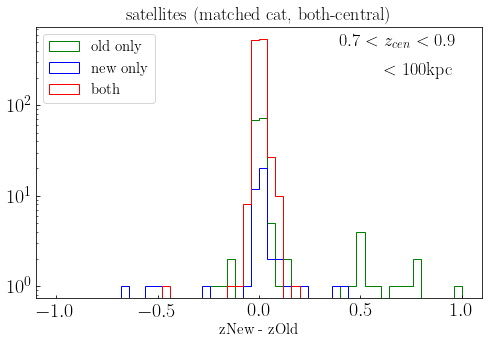

In [585]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))

z_diff_old_only = cat_sat_old_only_cut['Z_BEST_BC03']-cat_sat_old_only_cut['zKDEPeak']
z_diff_new_only = cat_sat_new_only_cut['Z_BEST_BC03']-cat_sat_new_only_cut['zKDEPeak']
z_diff_both = cat_sat_both_cut['Z_BEST_BC03']-cat_sat_both_cut['zKDEPeak']

plt.hist(z_diff_old_only,bins=50,range=(-1,1),color='g',histtype='step', label='old only')
plt.hist(z_diff_new_only,bins=50,range=(-1,1),color='b',histtype='step',label='new only')
plt.hist(z_diff_both,bins=50,range=(-1,1),color='r',histtype='step',label='both')

plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.68,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('$<'+str(r_cut)+'$kpc',xy=([0.78,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel('zNew - zOld',fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15,loc='upper left')
plt.title('satellites (matched cat, both-central)',fontsize=18)

# fraction of big diff
d = 0.1
print('old_only',round(len(z_diff_old_only[abs(z_diff_old_only)>d])/len(z_diff_old_only),3))
print('new_only',round(len(z_diff_new_only[abs(z_diff_new_only)>d])/len(z_diff_new_only),3))
print('both',round(len(z_diff_both[abs(z_diff_both)>d])/len(z_diff_both),3))

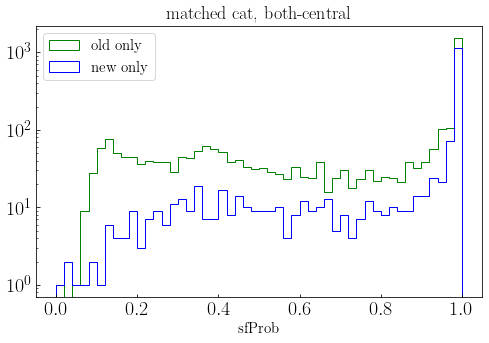

In [611]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_stack_old_only['sfProb'],
         bins=50,range=(0,1),color='g',histtype='step',
        label='old only')
plt.hist(cat_sat_stack_new_only['sfProb'],
         bins=50,range=(0,1),color='b',histtype='step',
        label='new only')

plt.title('matched cat, both-central',fontsize=18)
plt.yscale('log')
plt.xlabel('sfProb',fontsize=15)
plt.legend(fontsize=15,loc='upper left')

look at individual satellite catalogs (per one central)

In [476]:
rand_n = 40
cat_name = 'DEEP_deep'

filelist_old = glob.glob('CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_old_params/'+cat_name+'_4.0/*_sat.fits')
filename_old = filelist_old[rand_n]
cat1 = Table.read(filename_old)

filelist_new = glob.glob('CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_new_params/'+cat_name+'_4.0/*_sat.fits')
filename_new = filelist_new[rand_n]
cat2 = Table.read(filename_new)

print(len(cat1),len(cat2))

36 45


In [485]:
overlap_count = 0
cat_sat_stack_both_params = Table(names=cat1.colnames, dtype=[str(y[0]) for x, y in cat1.dtype.fields.items()])
for gal in cat2:
    if gal['NUMBER'] in cat1['NUMBER']:
        overlap_count += 1
        cat_sat_stack_both_params.add_row(gal)

print(overlap_count)

34


### sat/bkg catalogs
stacking them in each redshift bin

In [631]:
cat_type = 'bkg'
path = 'CUT_deep_catalogs/total_sample_0330/'
cat_temp = Table.read('CUT_deep_catalogs/table_template_old_cat.fits')
bkg_num = []
for z in [0.4, 0.6, 0.8]:
    bkg_num_z = 0
    cat_sat_stack = Table(names=cat_temp.colnames, dtype=[str(y[0]) for x, y in cat_temp.dtype.fields.items()])
    for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
        sat_path = path+cat_name+'_'+str(z*10)+'/'
        if cat_type == 'cen':
            filelist =  glob.glob(sat_path+'/isolated*.fits')
        else:
            filelist = glob.glob(sat_path+'/*_'+cat_type+'.fits')
            bkg_num_z += len(filelist)
        for filename in filelist:
            cat = Table.read(filename)
            cat_sat_stack = vstack([cat_sat_stack, cat])
    bkg_num.append(bkg_num_z)
    cat_sat_stack = unique(cat_sat_stack,keys='NUMBER')
    cat_sat_stack.write(path+'cat_'+cat_type+'_'+str(z)+'.fits',overwrite=True)
    print(z,len(cat_sat_stack))
np.save(path+'bkg_aperture_num_zbins.npy',np.array(bkg_num))

0.4 26764
0.6 38189
0.8 59781


Fig.2 in paper

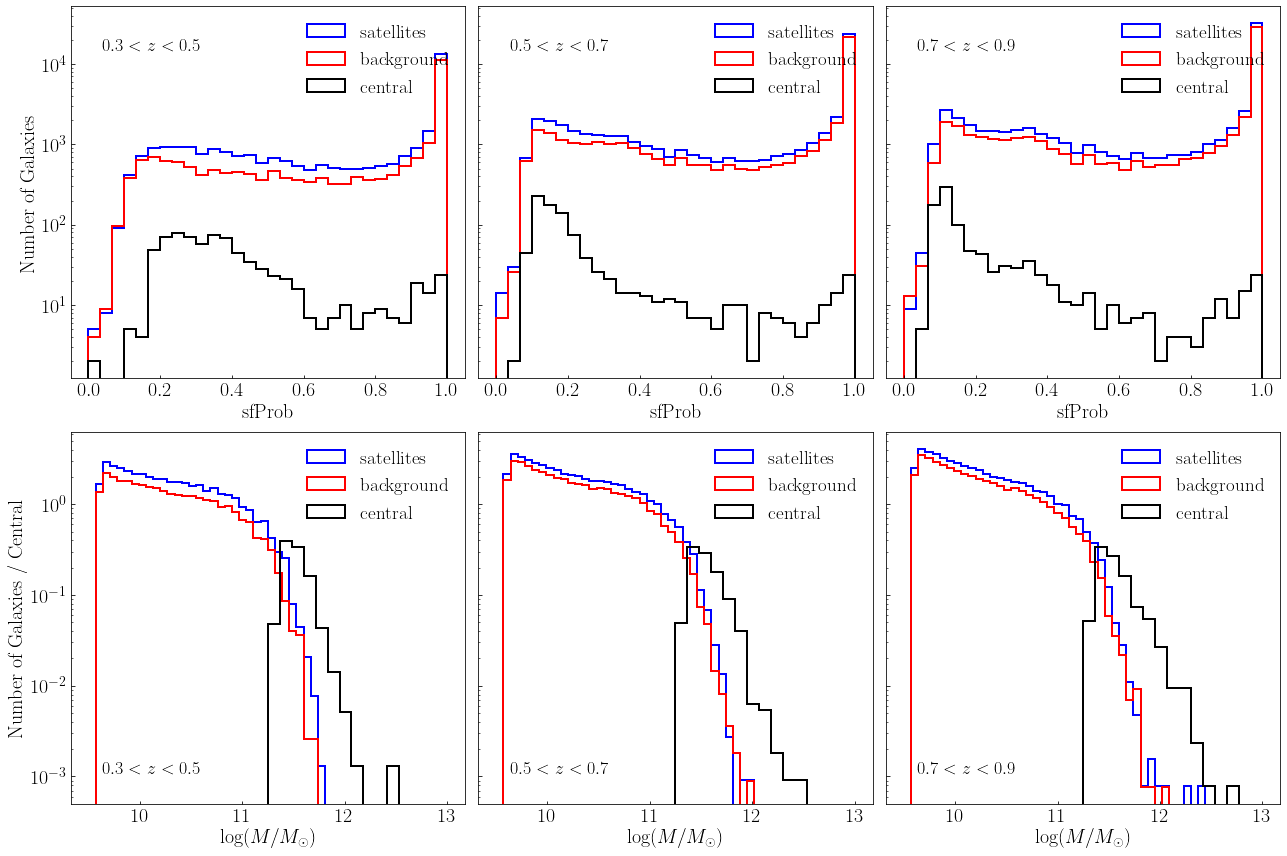

In [628]:
fig, axs = plt.subplots(2, 3, sharey='row', figsize = (18, 12),gridspec_kw={'height_ratios':[4,4]})
zs = [0.4,0.6,0.8]
path = 'CUT_deep_catalogs/versionB/total_sample_M1135_m96_0331/'
bkg_num_z_bins = np.load(path+'bkg_aperture_num_zbins.npy')
for i in range(3):
    z=zs[i]
    bkg_num_zbin = bkg_num_z_bins[i]
    cat_stack = Table.read(path+'cat_st_'+str(z)+'.fits')
    cat_stack_bkg = Table.read(path+'cat_bkg_'+str(z)+'.fits')
    cat_central = Table.read(path+'cat_cen_'+str(z)+'.fits')

    sfprob_list = cat_stack['sfProb']
    sfprob_list_bkg = cat_stack_bkg['sfProb']
    sfprob_list_cen = cat_central['sfProb']
    mass_list = np.array(cat_stack['MASS_MED'])
    mass_list_bkg = np.array(cat_stack_bkg['MASS_MED'])
    mass_list_cen = np.array(cat_central['MASS_MED'])
    
    # sfprob distribution plot
    axs[0][i].hist(sfprob_list,range=(0,1.0),histtype='step',linewidth=2, color='b',bins=30,label='satellites')
    axs[0][i].hist(sfprob_list_bkg,range=(0,1),histtype='step',linewidth=2, color='r',bins=30,label='background')
    axs[0][i].hist(sfprob_list_cen,range=(0,1),histtype='step',linewidth=2, color='k',bins=30,label='central')
    
    # mass distribution plot
    axs[1][i].hist(mass_list,range=(9.5,13),histtype='step',linewidth=2, color='b',bins=50,
         weights=np.ones(len(mass_list))/len(cat_central),label='satellites')
    axs[1][i].hist(mass_list_bkg,range=(9.5,13),histtype='step',linewidth=2, color='r',bins=50,
         weights=np.ones(len(mass_list_bkg))/bkg_num_zbin,label='background')
    axs[1][i].hist(mass_list_cen,range=(9.5,13),histtype='step',linewidth=2, color='k',bins=30,
         weights=np.ones(len(mass_list_cen))/len(cat_central),label='central')
    
    axs[0][0].set_yscale('log')
    axs[1][0].set_yscale('log')
    axs[0][i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.88]),
             xycoords='axes fraction',fontsize=18,color='k')
    axs[1][i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.08]),
             xycoords='axes fraction',fontsize=18,color='k')
    
    axs[0][i].set_xlabel('sfProb',fontsize=20)
    axs[0][0].set_ylabel('Number of Galaxies',fontsize=20)
    axs[1][i].set_xlabel(r'$\log(M/M_\odot)$',fontsize=20)
    axs[1][0].set_ylabel('Number of Galaxies / Central',fontsize=20)
    axs[0][i].legend(fontsize=19,frameon=False)
    axs[1][i].legend(fontsize=19,loc='upper right',frameon=False)

fig.subplots_adjust(wspace=0)  
plt.tight_layout()
plt.savefig('figures/sfprob_mass_hist_combined.png',dpi=150)

sat - bkg per aperture

0.4 sat 22517.0 9222.0
0.4 bkg 17540.0 6289.0
0.4 sat - bkg 1.6968973747016707
0.6 sat 36950.0 16010.0
0.6 bkg 31923.0 12317.0
0.6 sat - bkg 1.3612239371784458
0.8 sat 46843.0 18481.0
0.8 bkg 40282.0 14254.0
0.8 sat - bkg 1.5521646557842441


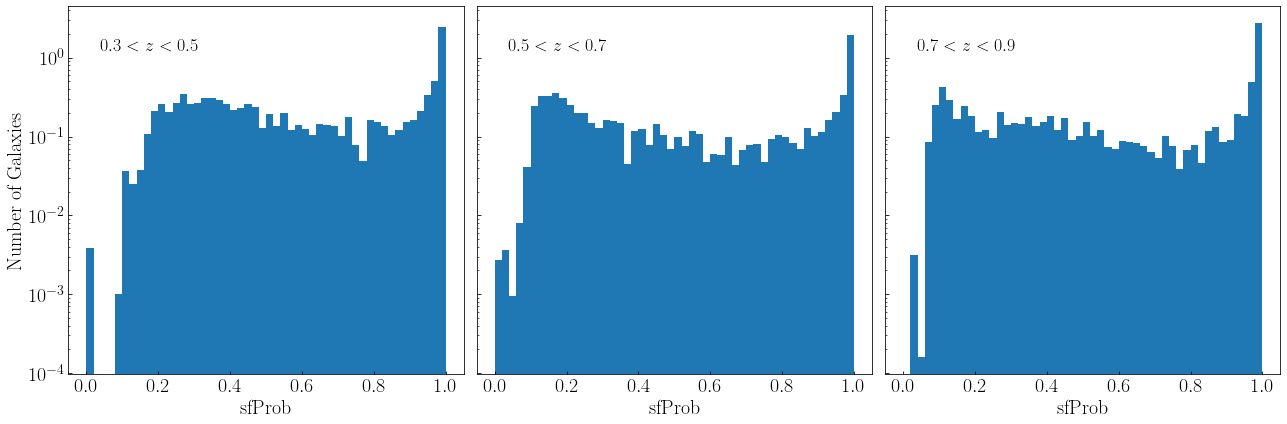

In [685]:
fig, axs = plt.subplots(1, 3, sharey='row', figsize = (18, 6))
zs = [0.4,0.6,0.8]
path = 'CUT_deep_catalogs/versionB/total_sample_M1135_m96_0331/'
bkg_num_z_bins = np.load(path+'bkg_aperture_num_zbins.npy')
for i in range(3):
    z=zs[i]
    bkg_num_zbin = bkg_num_z_bins[i]
    cat_stack = Table.read(path+'cat_sat_'+str(z)+'.fits')
    cat_stack_bkg = Table.read(path+'cat_bkg_'+str(z)+'.fits')
    cat_central = Table.read(path+'cat_cen_'+str(z)+'.fits')

    sfprob_list = cat_stack['sfProb']
    sfprob_list_bkg = cat_stack_bkg['sfProb']
    
    # sfprob distribution plot
    sat_hist, bin_edges = np.histogram(sfprob_list,range=(0,1.0), bins=50)
    bkg_hist, bin_edges = np.histogram(sfprob_list_bkg,range=(0,1.0), bins=50)
    axs[i].bar(bin_edges[:-1]+1/50./2,sat_hist/len(cat_central)-bkg_hist/bkg_num_zbin,1/50.)
    
    # fraction of sat/bkg with sfProb>0.94
    nsf_sat = round(sum(sat_hist*bin_edges[:-1]))
    nq_sat = round(sum(sat_hist*(1-bin_edges[:-1])))
    nsf_bkg = round(sum(bkg_hist*bin_edges[:-1]))
    nq_bkg = round(sum(bkg_hist*(1-bin_edges[:-1])))
    print(z,'sat',nsf_sat,nq_sat)
    print(z,'bkg',nsf_bkg,nq_bkg)
    print(z,'sat - bkg',(nsf_sat-nsf_bkg)/(nq_sat-nq_bkg))
    
    axs[0].set_yscale('log')
    axs[i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.88]),
             xycoords='axes fraction',fontsize=18,color='k')
    
    axs[i].set_xlabel('sfProb',fontsize=20)
    axs[0].set_ylabel('Number of Galaxies',fontsize=20)

fig.subplots_adjust(wspace=0)  
plt.tight_layout()
plt.savefig('figures/sfprob_mass_hist_combined.png',dpi=150)
                

### dynamical friction time-scale $t_{df}$

### $t_{df}=\frac{A}{\ln{\Lambda}} \frac{M_h}{M_s} \frac{R_{vir}}{v_c}$ 
Binney&Tremaine1987(2008)

In [114]:
def mh(log_Ms, params):
    M1, Ms0, beta, delta, gamma = params[0],params[1],params[2],params[3],params[4]
    Ms = 10**log_Ms
    log_mh = np.log10(M1)+beta*np.log10(Ms/Ms0)+(Ms/Ms0)**delta/(1+(Ms/Ms0)**(-1*gamma))-0.5
    return log_mh

# Leauthaud et al. 2012 (0.22<z<0.48)
def set_params(a,b,c,d,e):
    M1 = 10**(12.52 + a*0.037)
    Ms0 = 10**(10.916 + b*0.02)
    beta = 0.457 + c*0.009
    delta = 0.566 + d*0.086
    gamma = 1.53 + e*0.18
    return M1, Ms0, beta, delta, gamma

# Coupon et al. 2015 (0.5<z<1)
def set_params_coupon(a,b,c,d,e):
    M1 = 10**(12.84 + a*0.023)
    Ms0 = 10**(10.98 + b*0.017)
    beta = 0.48 + c*0.019
    delta = 0.63 + d*0.084
    gamma = 1.6 + e*0.18
    return M1, Ms0, beta, delta, gamma


In [31]:
#(M_s subhalo mass, M_h halo mass, R_vir virial radius, rho_bar critical density)

def t_df(m_h, m_s):
    rho_bar = 9.9e-27 #kg/m**3
    r_vir = (3*m_h/(800*rho_bar*np.pi))**(1/3)
    G = 6.67e-11
    t_df = 1.17/np.log(1+m_h/m_s)*(m_h**0.5/m_s)*r_vir**1.5/G**0.5
    return t_df/3.1e7/10**9  # in Gyr


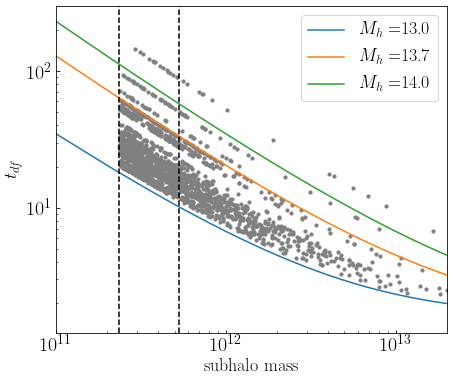

In [135]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(7, 6))
m_s = np.linspace(10**11,10**13.3,200)*2e30

cat_cen = Table.read('CUT_deep_catalogs/total_sample_0503/COSMOS_deep_4.0/isolated_COSMOS_deep_11.15_0.4_massive_normal_params_old.positions.fits')
for cen_info in cat_cen[:50]:
    cen_id = cen_info['NUMBER']
    cat_sat = Table.read('CUT_deep_catalogs/total_sample_0503/COSMOS_deep_4.0/COSMOS_deep_'+str(cen_id)+'_sat.fits')

    m_hs = mh(cen_info['MASS_MED'],set_params(0,0,0,0,0))
    m_ss = mh(cat_sat['MASS_MED'],set_params(0,0,0,0,0))
    t_dfs = t_df(10**m_hs*2e30, 10**m_ss*2e30)
    plt.scatter(10**m_ss,t_dfs,color='gray',s=10)

for log_m_h in [13.0,13.7,14.0]:
    m_h = 10**log_m_h*2e30
    t_dfs = t_df(m_h, m_s)
    plt.plot(m_s/2e30,t_dfs,label='$M_h=$'+str(log_m_h))

for m_s_cut in [9.5,10.2]:
    m_h_cut = mh(m_s_cut,set_params(0,0,0,0,0))
    plt.axvline(x=10**m_h_cut,ymin=0,ymax=1,color='k',linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlim([10**11,10**13.3])
plt.xlabel('subhalo mass',fontsize=18)
plt.ylabel('$t_{df}$',fontsize=18)
plt.legend(fontsize=18)

In [ ]:
m_s = np.linspace(10**11.5,10**12.5,200)*2e30
for log_m_h in [13.0,13.7,14.0]:
    m_h = 10**log_m_h*2e30
    t_dfs = t_df(m_h, m_s)
    plt.plot(m_s/2e30,t_dfs,label='$M_h=$'+str(log_m_h))
    
plt.xscale('log')
plt.xlabel('subhalo mass',fontsize=18)
plt.ylabel('$t_{df}$',fontsize=18)
plt.legend(fontsize=18)

### mass distribution of satellite <100kpc
low/high mass fraction change significantly from old to new cat?

In [ ]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))

# old params
path = 'CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_old_params_0405/'
cat_sat_stack_4 = Table.read(path+'sat_cat4.0.fits')
cat_sat_stack_6 = Table.read(path+'sat_cat6.0.fits')
cat_sat_stack_8 = Table.read(path+'sat_cat8.0.fits')
plt.hist(cat_sat_stack_4['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='k')
plt.hist(cat_sat_stack_6['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='b')
plt.hist(cat_sat_stack_8['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='r')

# new params
path = 'CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_new_params_0405/'
cat_sat_stack_4 = Table.read(path+'sat_cat4.0.fits')
cat_sat_stack_6 = Table.read(path+'sat_cat6.0.fits')
cat_sat_stack_8 = Table.read(path+'sat_cat8.0.fits')
plt.hist(cat_sat_stack_4['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='k',linestyle='--')
plt.hist(cat_sat_stack_6['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='b',linestyle='--')
plt.hist(cat_sat_stack_8['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='r',linestyle='--')


plt.xlabel('MassNew / MassOld  (log)',fontsize=15)
plt.yscale('log')
# plt.legend(fontsize=15,loc='upper left')

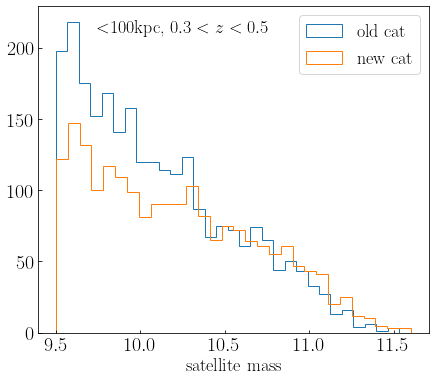

In [234]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(7, 6))

path = 'CUT_deep_catalogs/total_sample_0503/'
cat_sat_old = Table.read(path+'cat_sat_0.4.fits')

path = 'CUT_deep_catalogs/total_sample_new_cat_0503/'
cat_sat_new = Table.read(path+'cat_sat_0.4.fits')

cat_sat_old = cat_sat_old[cat_sat_old['radius']<100]
cat_sat_new = cat_sat_new[cat_sat_new['radius']<100]
plt.hist(cat_sat_old['MASS_MED'],histtype='step',bins=30,label='old cat')
plt.hist(cat_sat_new['MASS_MED']-0.1,histtype='step',bins=30,label='new cat')
plt.annotate('$<$100kpc, $0.3<z<0.5$',xy=([0.15,0.92]),xycoords='axes fraction',fontsize=18)
plt.xlabel('satellite mass',fontsize=18)
plt.legend(fontsize=18)
# plt.yscale('log')

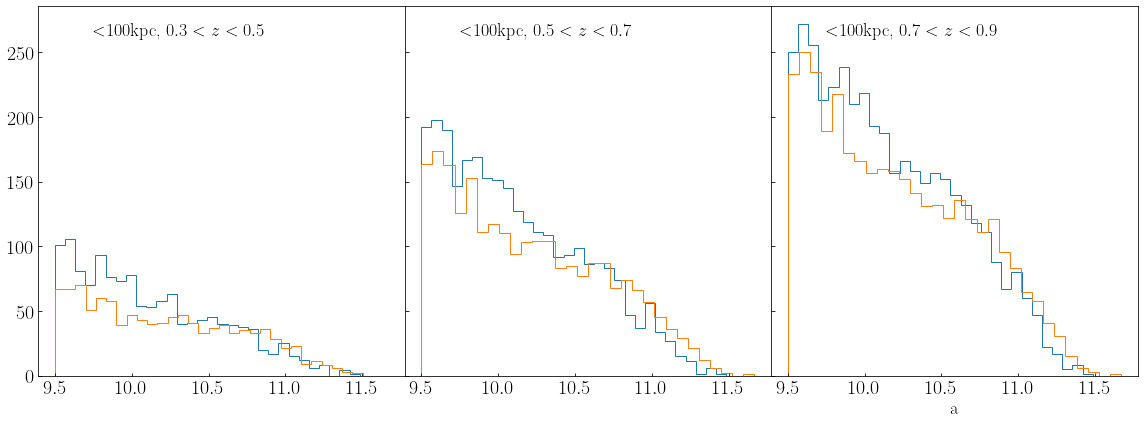

In [22]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,6))
plt.xlabel('a', fontsize=18)

for i,z in enumerate([0.4, 0.6, 0.8]):
    path = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/'
    cat_sat_old = Table.read(path+'sat_cat'+str(z*10)+'.fits')

    path = 'CUT_deep_catalogs/total_sample_matched_cat_new_params_both-central_0506/'
    cat_sat_new = Table.read(path+'sat_cat'+str(z*10)+'.fits')

    cat_sat_old = cat_sat_old[cat_sat_old['radius']<100]
    cat_sat_new = cat_sat_new[cat_sat_new['radius']<100]
    axs[i].hist(cat_sat_old['MASS_MED'],histtype='step',bins=30,label='old cat')
    axs[i].hist(cat_sat_new['MASS_MED_new']-0.1,histtype='step',bins=30,label='new cat')
    axs[i].annotate('$<$100kpc, $'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.15,0.92]),xycoords='axes fraction',fontsize=18)
    
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

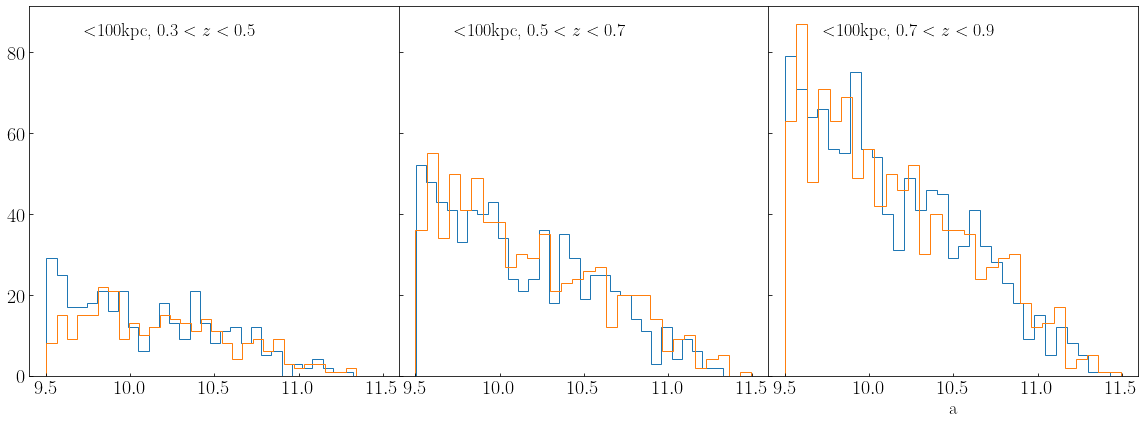

In [23]:
# bkg fraction?

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,6))
plt.xlabel('a', fontsize=18)

for i,z in enumerate([0.4, 0.6, 0.8]):
    path = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/'
    cat_sat_old = Table.read(path+'bkg_cat'+str(z*10)+'.fits')

    path = 'CUT_deep_catalogs/total_sample_matched_cat_new_params_both-central_0506/'
    cat_sat_new = Table.read(path+'bkg_cat'+str(z*10)+'.fits')

    cat_sat_old = cat_sat_old[cat_sat_old['radius']<100]
    cat_sat_new = cat_sat_new[cat_sat_new['radius']<100]
    axs[i].hist(cat_sat_old['MASS_MED'],histtype='step',bins=30,label='old cat')
    axs[i].hist(cat_sat_new['MASS_MED_new']-0.1,histtype='step',bins=30,label='new cat')
    axs[i].annotate('$<$100kpc, $'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.15,0.92]),xycoords='axes fraction',fontsize=18)
    
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

### the goodz results for matched cat (both-central)
fraction of satellites removed due to $|z_A - z_T|>0.05z_T$

In [556]:
for z in [0.4, 0.6, 0.8]:
    # read in satellite catalog not removing highz contam.
    path = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/'
    cat_sat_not_remove = Table.read(path+'sat_cat'+str(z*10)+'.fits')

    # read in satellite catalog removing highz contam.
    path = 'CUT_deep_catalogs/total_sample_matched_cat_both-central_old_params_goodz_0529/'
    cat_sat_remove = Table.read(path+'sat_cat'+str(z*10)+'.fits')
    
    # compare the number
    print(len(cat_sat_remove)/len(cat_sat_not_remove))

0.944571883338795
0.9479247960269599
0.9451153373345867


### How often a central galaxy has satellites within 1/2 sigma in Mass?

In [480]:
# stack individual central catalogs 

params = 'old'
path = 'CUT_deep_catalogs/total_sample_matched_cat_'+params+'_params_both-central_0506/'

# stack satellite catalogs by redshift bins (combining from all fields)
for z in [0.4, 0.6, 0.8]:
    
    # create cat template for stacking (from the same dir)
    filelist = glob.glob(path+'COSMOS_deep_4.0/*_sat.fits')
    cat_cen_temp = Table.read(filelist[0])
    cat_cen_stack =  Table(names=cat_cen_temp.colnames, dtype=[str(y[0]) for x, y in cat_cen_temp.dtype.fields.items()])
    
    for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
        cen_path = path+cat_name+'_'+str(z*10)+'/'
        cat = Table.read(cen_path+'isolated_'+cat_name+'_11.15_'+str(z)+'_massive_both-central_params_'+params+'.positions.fits')
        cat_cen_stack = vstack([cat_cen_stack, cat])

    cat_cen_stack = unique(cat_cen_stack,keys='NUMBER')
    cat_cen_stack.write(path+'cen_cat'+str(z*10)+'.fits',overwrite=True)
    print('z =',z,len(cat_cen_stack))

z = 0.4 475
z = 0.6 544
z = 0.8 500


In [495]:
# output the fraction

z = 0.4
params='new'
path = 'CUT_deep_catalogs/total_sample_matched_cat_'+params+'_params_both-central_0506/'
factor = 1
cen_count = 0
cen_iso = 0
for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
    cen_path = path+cat_name+'_'+str(z*10)+'/'
    cen_cat = Table.read(cen_path+'isolated_'+cat_name+'_11.35_'+str(z)+'_massive_both-central_params_'+params+'.positions.fits')
    for cen in cen_cat:a
        cen_count += 1
        sat_cat = Table.read(cen_path+'/'+cat_name+'_'+str(cen['NUMBER'])+'_sat.fits')
        one_sig = cen['MASS_MED'] - cen['MASS_INF']
        max_mass_sats = max(sat_cat['MASS_MED'])
        if cen['MASS_MED'] - factor*one_sig > max_mass_sats:
            cen_iso+= 1

print(str(factor)+'sig',round(cen_iso/cen_count,2))

1sig 0.78


check central sample (both-central) for m_diff and z_diff

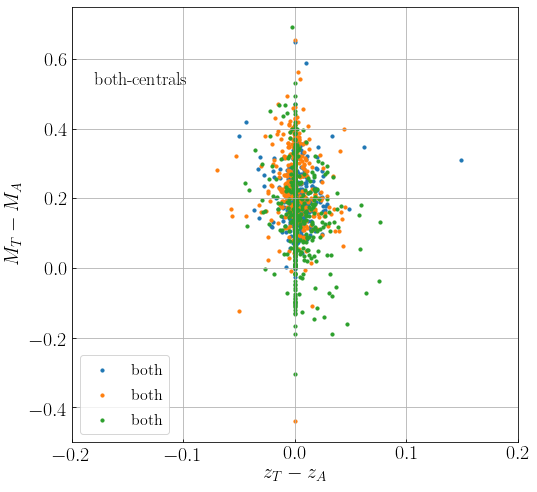

In [73]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))
params='new'
path = 'CUT_deep_catalogs/total_sample_matched_cat_'+params+'_params_both-central_0506/'

for z in [0.4, 0.6, 0.8]:
    cen_cat = Table.read(path+'cen_cat'+str(z*10)+'.fits')
    plt.scatter(cen_cat['Z_BEST_BC03']-cen_cat['zKDEPeak'], cen_cat['MASS_MED_new']-cen_cat['MASS_MED'],label='both',s=10)


plt.xlim([-0.2,0.2])
plt.ylim([-0.5,0.75])
# plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.annotate('both-centrals',xy=([0.05,0.82]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$z_T-z_A$', fontsize=20)
plt.ylabel(r'$M_T - M_A$', fontsize=20)
plt.grid()
plt.legend(fontsize=16,loc='lower left')
plt.show(); plt.close()

### add a dummy sfProb line to COSMOS2015 catalog

In [553]:
cat_COSMOS = Table.read('COSMOS2015_Laigle+_v1.1_trim.fits')
sfprob_col = Column(Column(data=np.ones(len(cat_COSMOS)), name='sfProb', dtype='i4'))
cat_COSMOS.add_column(sfprob_col)
cat_COSMOS.write('COSMOS2015_Laigle+_v1.1_trim.fits',overwrite=True)

### check star-galaxy separation in matched cat

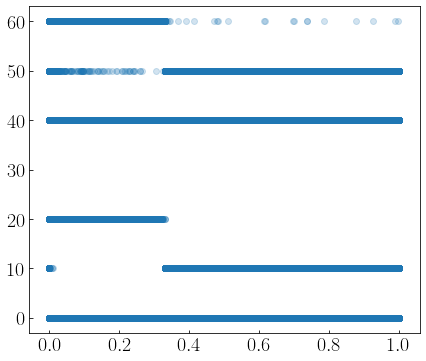

In [663]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(7, 6))
cat_name = 'ELAIS_deep'
cat_matched = Table.read('CUT_deep_catalogs/UV_CLAUDS_HSC_S16A_COSMOS_deep.fits')

plt.scatter(cat_matched['preds_median'],cat_matched['CLASS'],alpha=0.2)

In [26]:
new_cat = Table.read('CUT_deep_catalogs/UV_CLAUDS_HSC_S16A_MIXPHZ_PHYSPARAM_TM.fits')
new_cat = new_cat['MU_MAX_i','i']

In [ ]:
# gal_old
cat_gal_old = new_cat[new_cat['preds_median']<0.89]

# gal_new
cat_gal_old = new_cat[new_cat['CLASS']==0]

# star_old
cat_gal_old = new_cat[new_cat['preds_median']>0.89]

# star_new
cat_gal_old = new_cat[new_cat['CLASS']==10]

(15, 30)

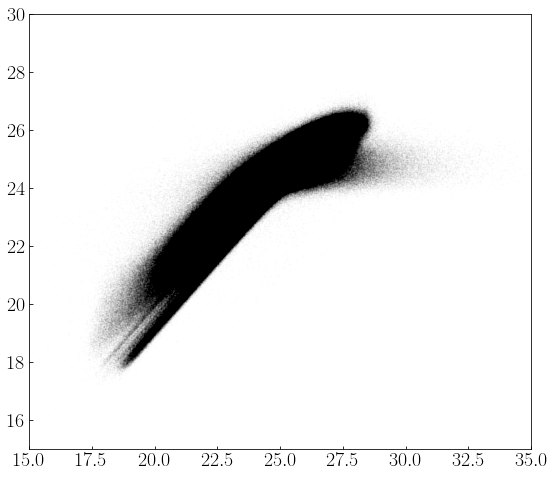

In [36]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(9, 8))

plt.scatter(new_cat['i'],new_cat['MU_MAX_i'],s=1,c='k',alpha=0.01)
plt.xlim([15,35])
plt.ylim([15,30])

### Combing (Averaging) r,i magnitudes

In [329]:
from astropy.table import Column
for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
    cat = Table.read('CUT_deep_catalogs/s16a_'+cat_name+'_masterCat_newz.fits')
    print(cat_name)
    if 'ri' in cat.keys():
        cat.remove_columns(['ri'])
    ri = 2.5*np.log10((10**(0.4*cat['i'])+ 10**(0.4*cat['r']))/2)
    ri_col = Column(data=ri,name='ri')
    cat.add_column(ri_col)
    cat.write('CUT_deep_catalogs/s16a_'+cat_name+'_masterCat_newz.fits',overwrite=True)

COSMOS_deep
DEEP_deep
ELAIS_deep
XMM-LSS_deep
SXDS_uddd


(15, 30)

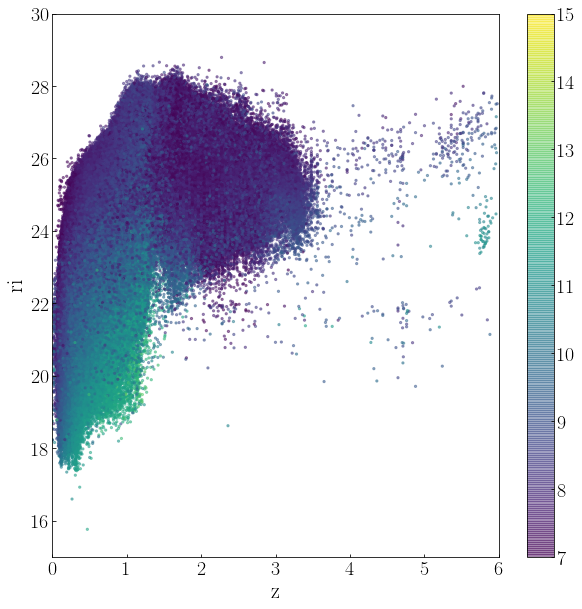

In [10]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(10, 10))
cat = Table.read('CUT_deep_catalogs/s16a_DEEP_deep_masterCat_newz.fits')
plt.scatter(cat['Z_BEST_BC03'],cat['i'],c=cat['MASS_MED'],s=5,alpha=0.5,vmin=7,vmax=15)
plt.colorbar()
plt.xlabel('z',fontsize=22)
plt.ylabel('ri',fontsize=22)
plt.xlim([0,6])
plt.ylim([15,30])

In [11]:
from astropy.cosmology import WMAP9

z=0.4
dl= WMAP9.luminosity_distance(z).value*1e6
M5000 = 25 - 5*np.log10(dl/10)+2.5*np.log10(1+z)
print(M5000)

-16.348642654098224


In [13]:
z=0.6
M5000=-16.34
dl= WMAP9.luminosity_distance(z).value*1e6
appr_mag = M5000 + 5*np.log10(dl/10) - 2.5*np.log10(1+z)
print(appr_mag)

25.921720257349666
